Generating plots for topology: linear


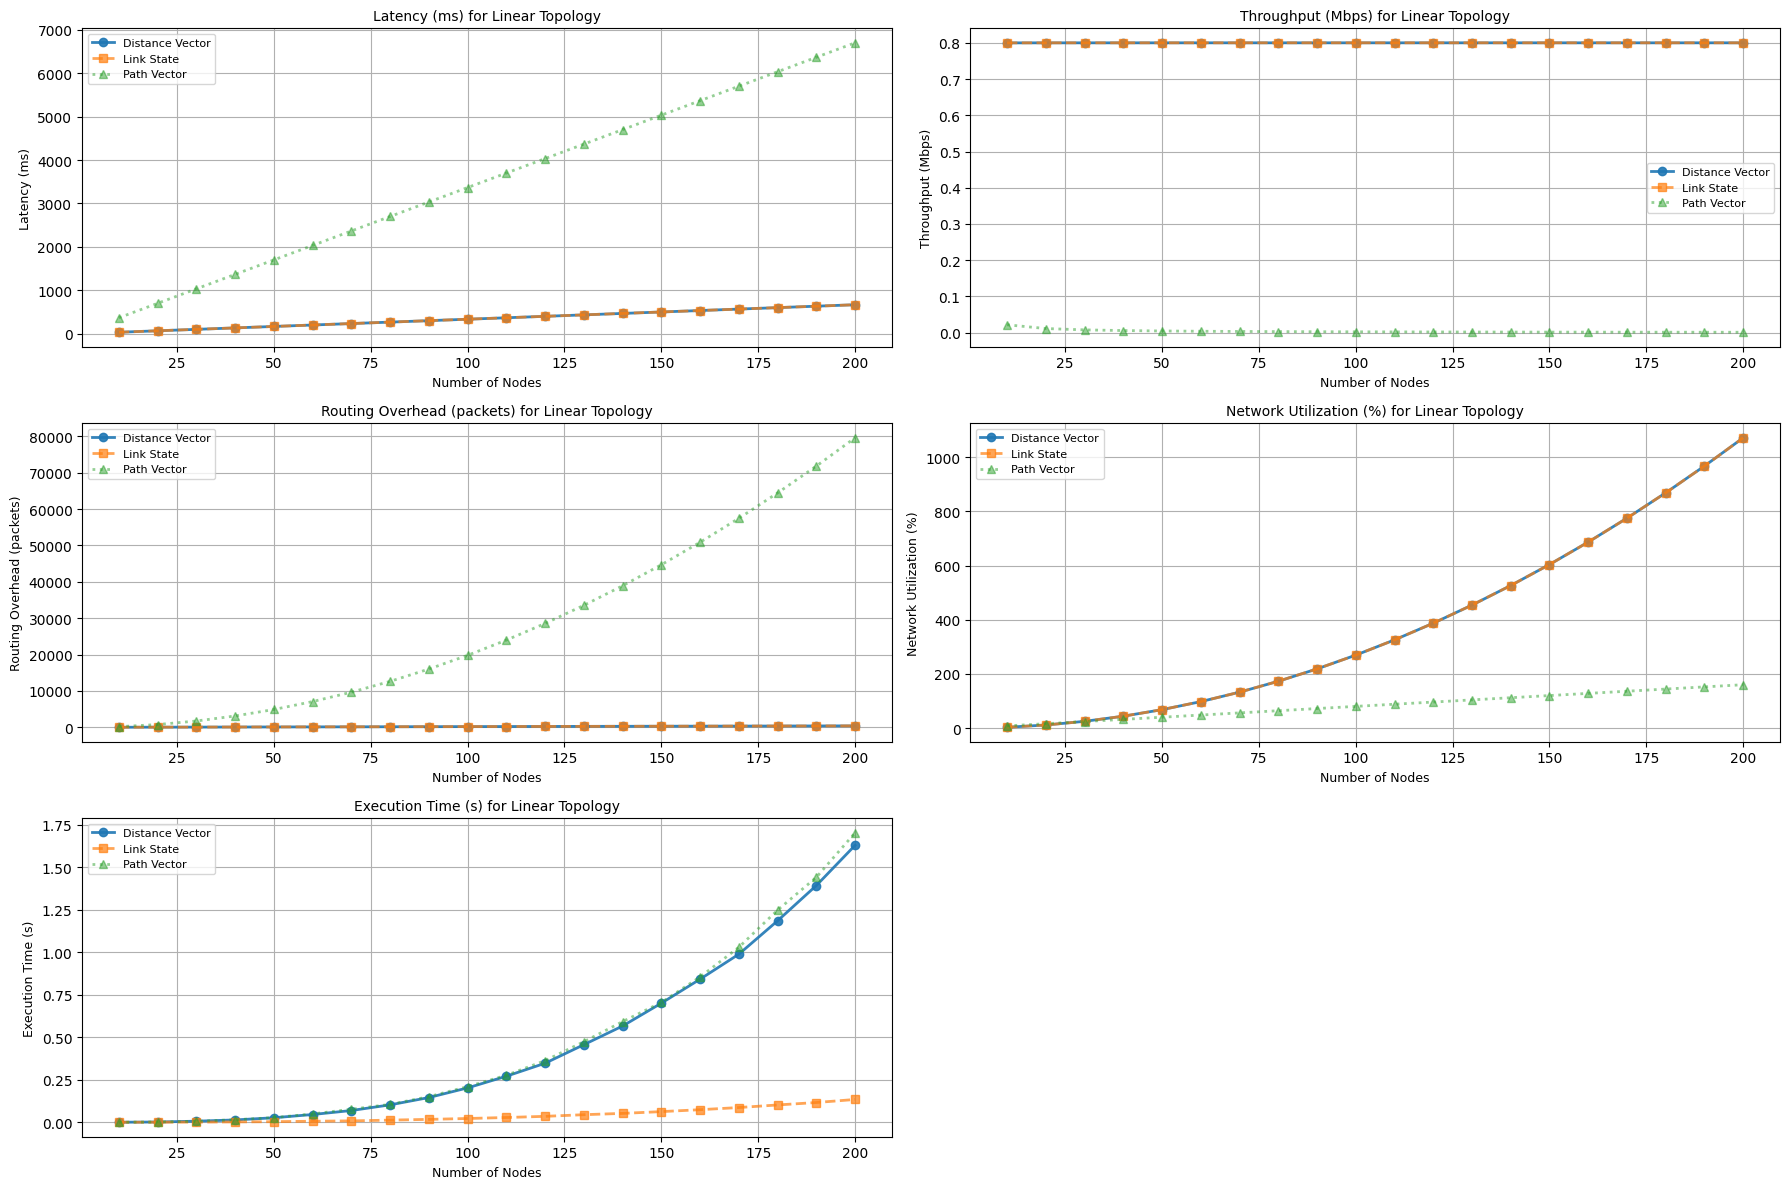

Generating plots for topology: star


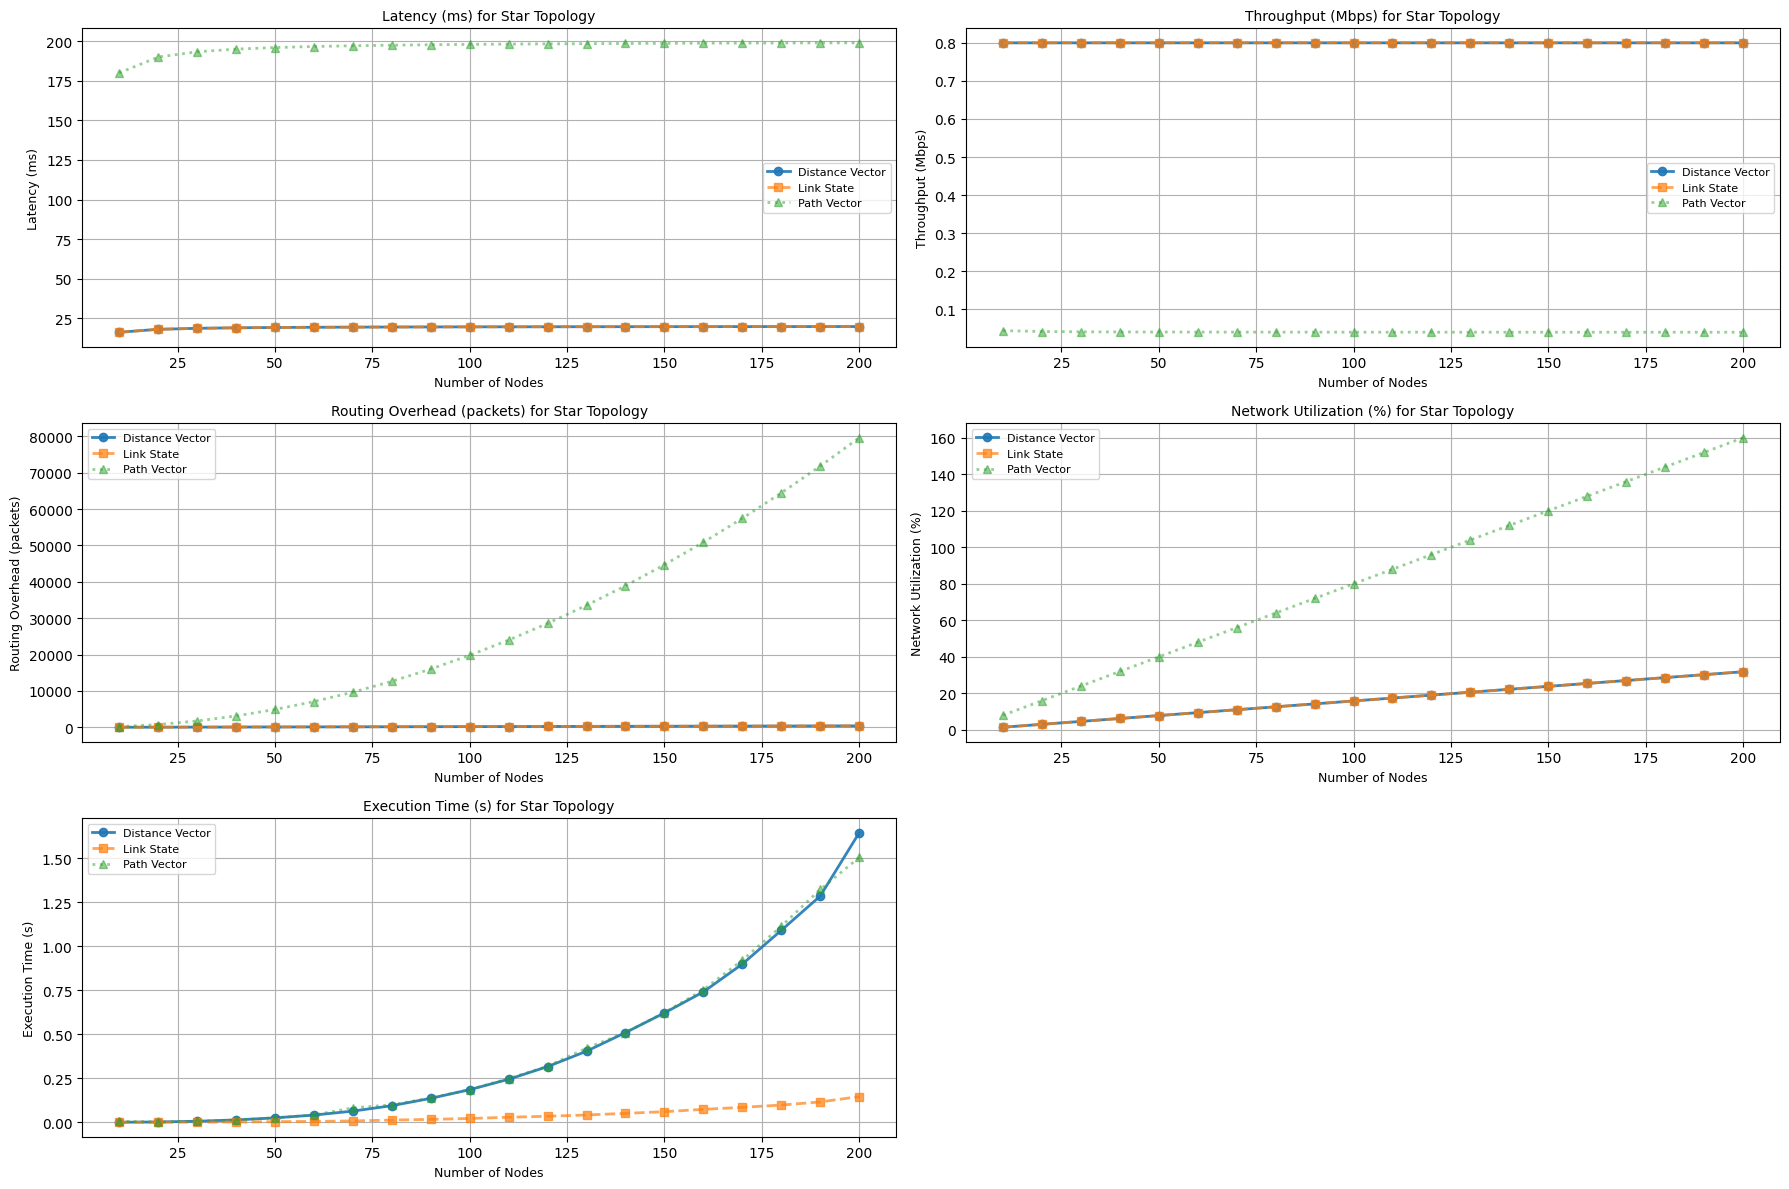

Generating plots for topology: mesh


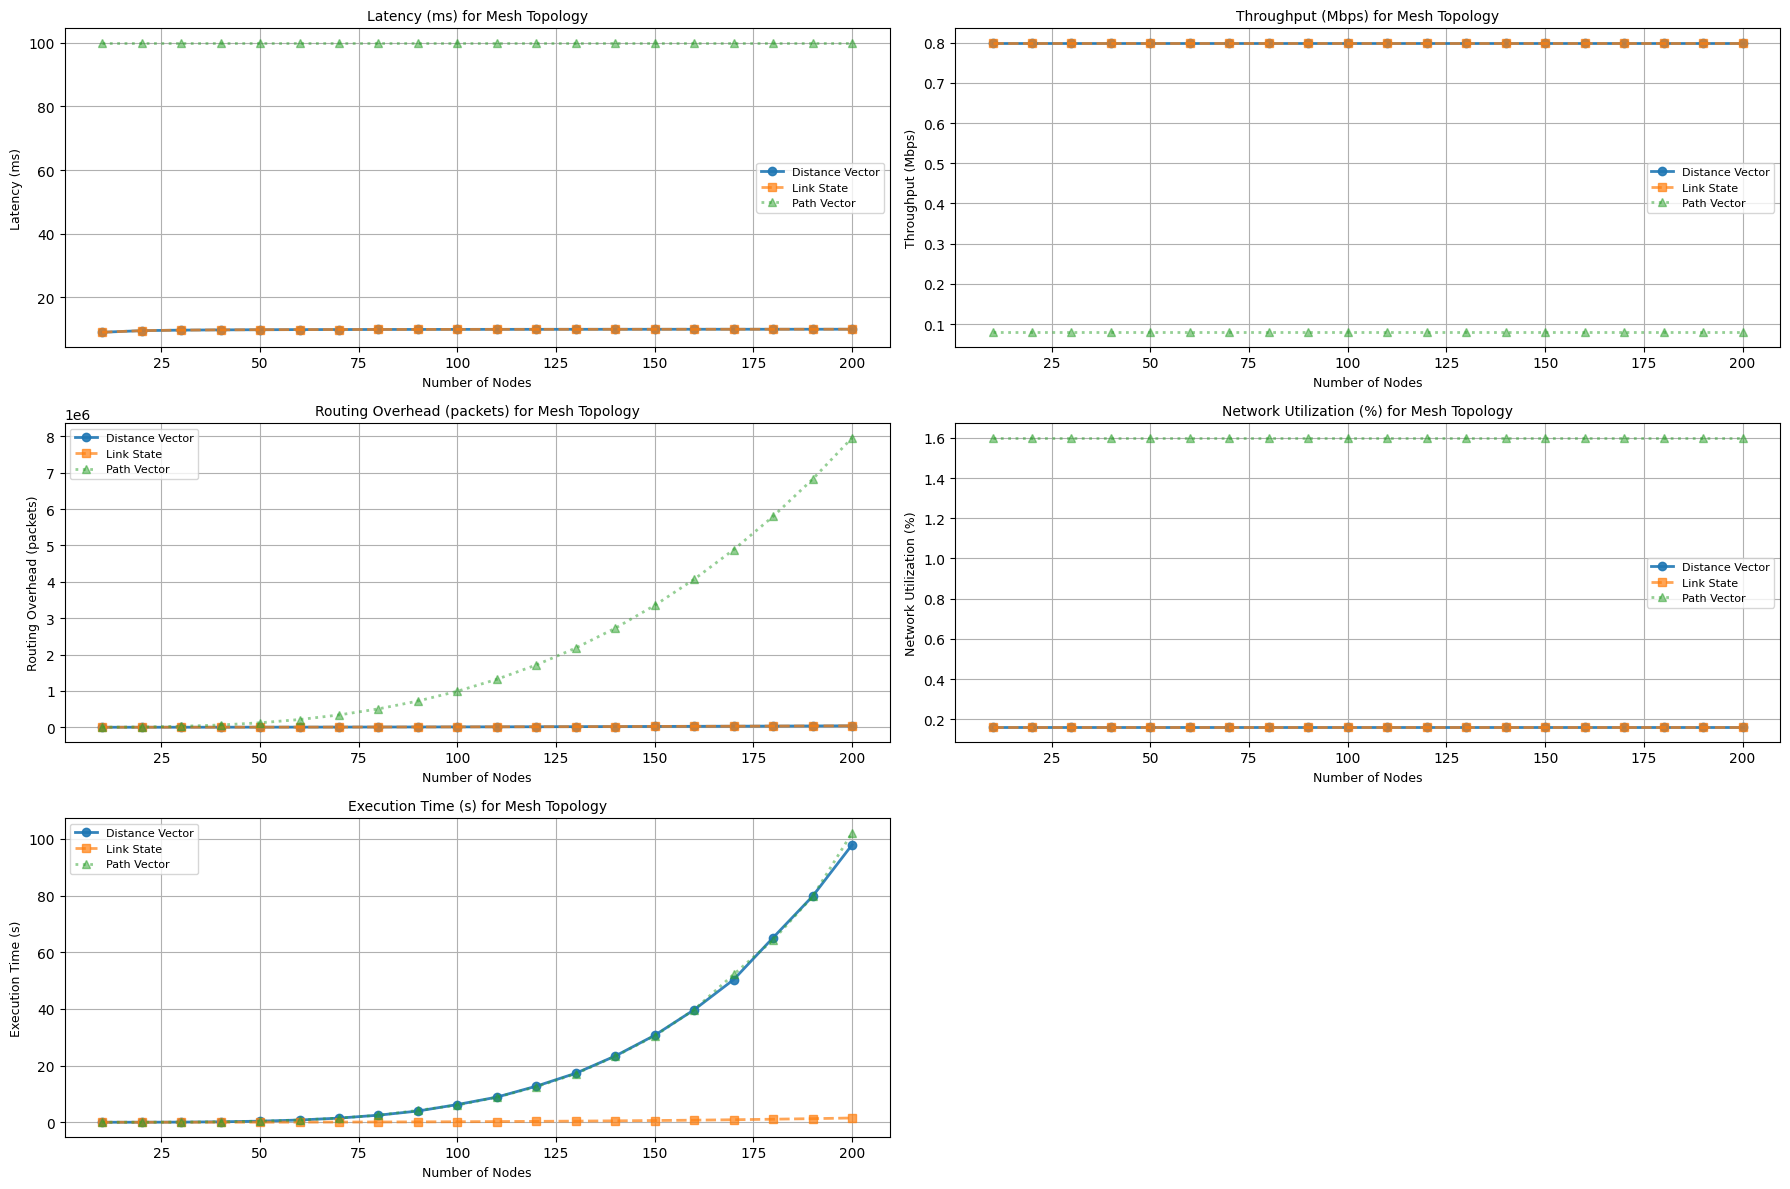

Generating plots for topology: ring


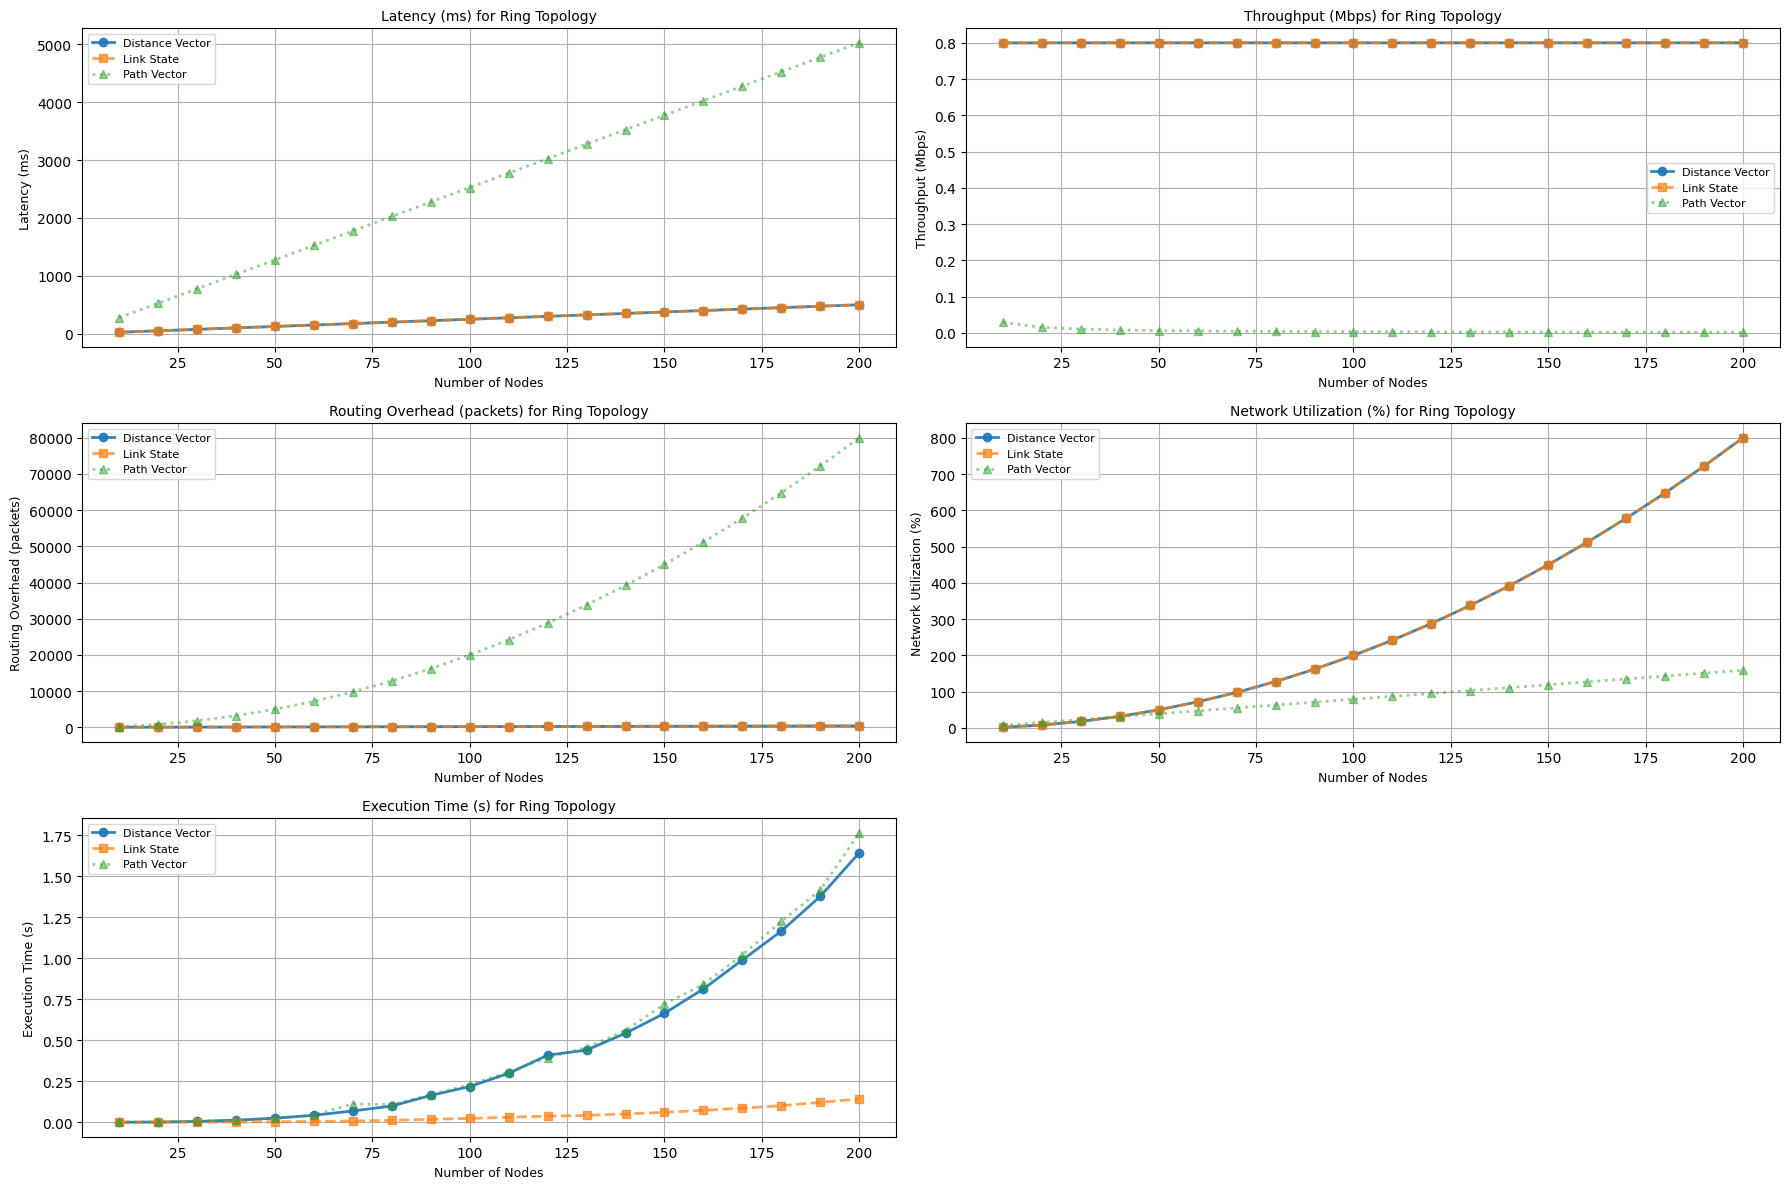

Generating plots for topology: grid


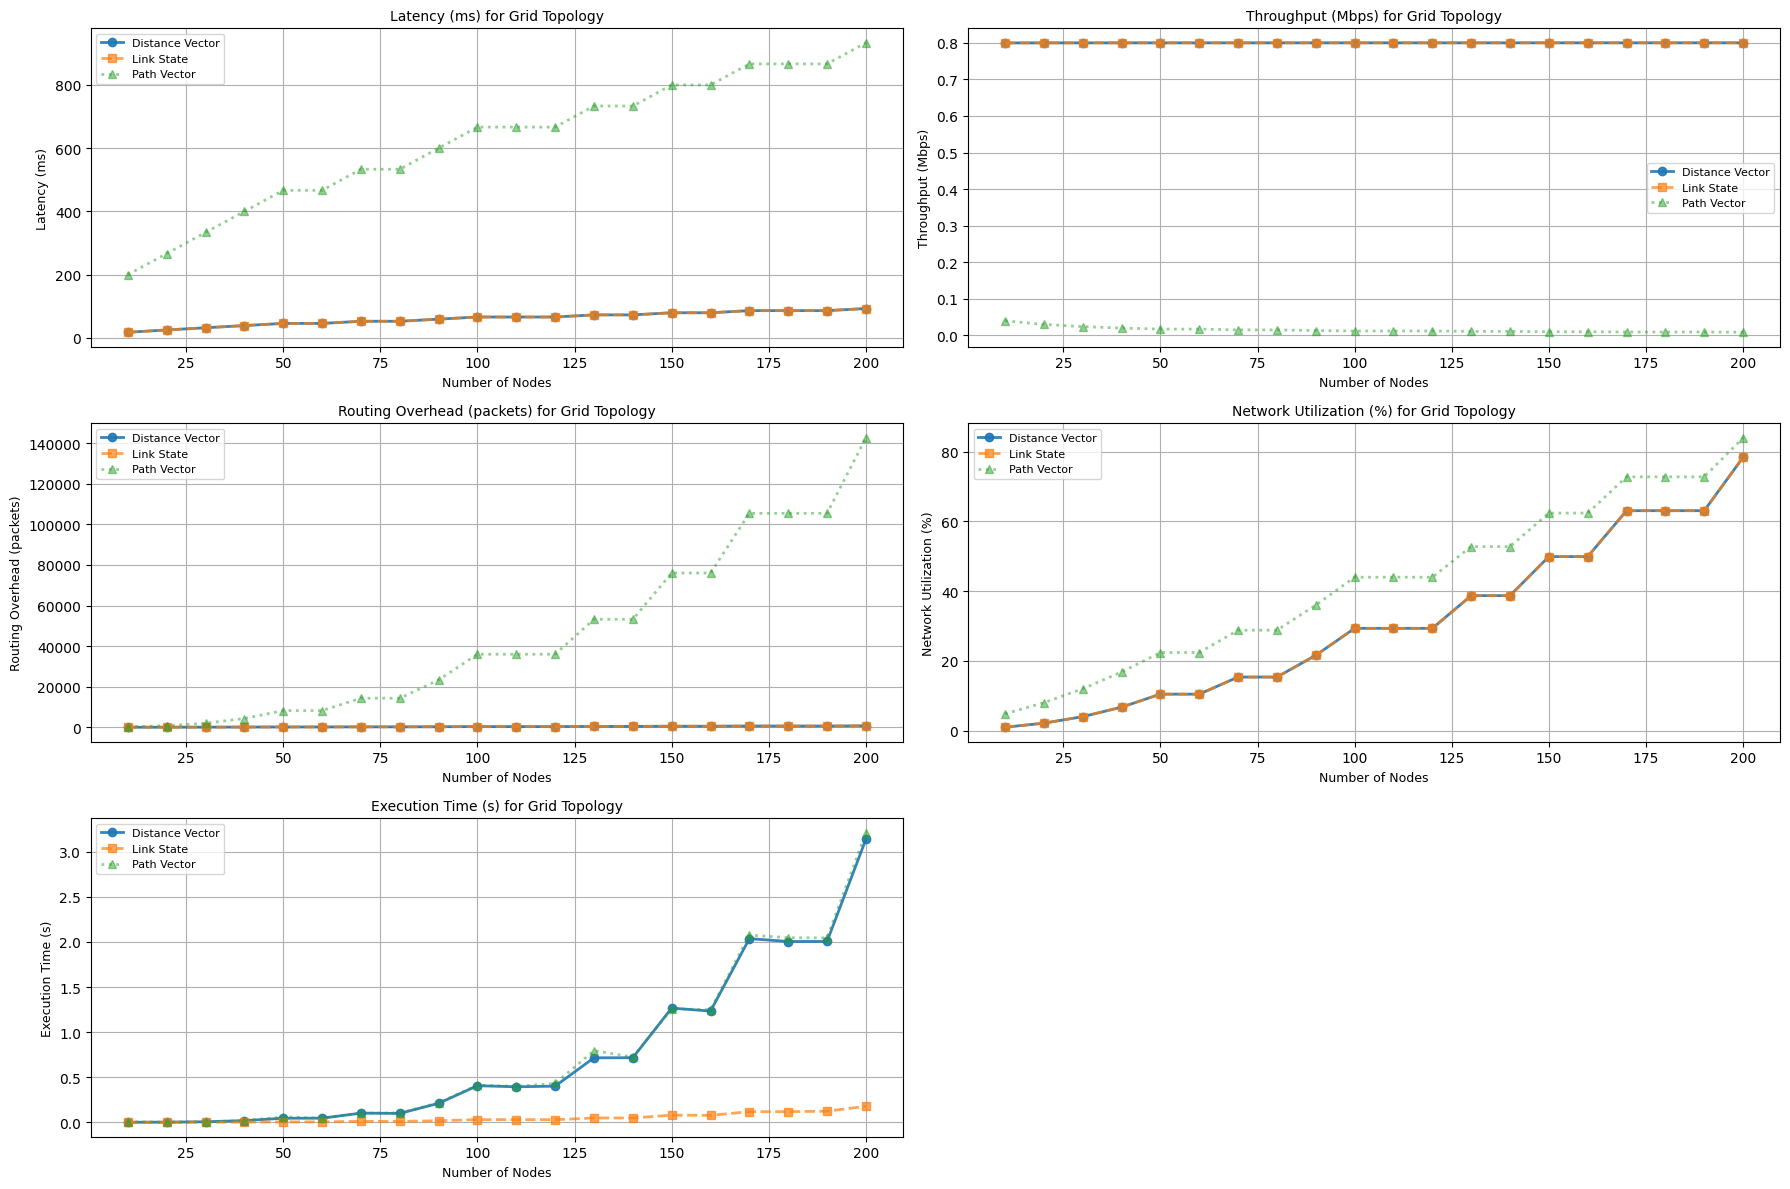

Generating plots for topology: tree


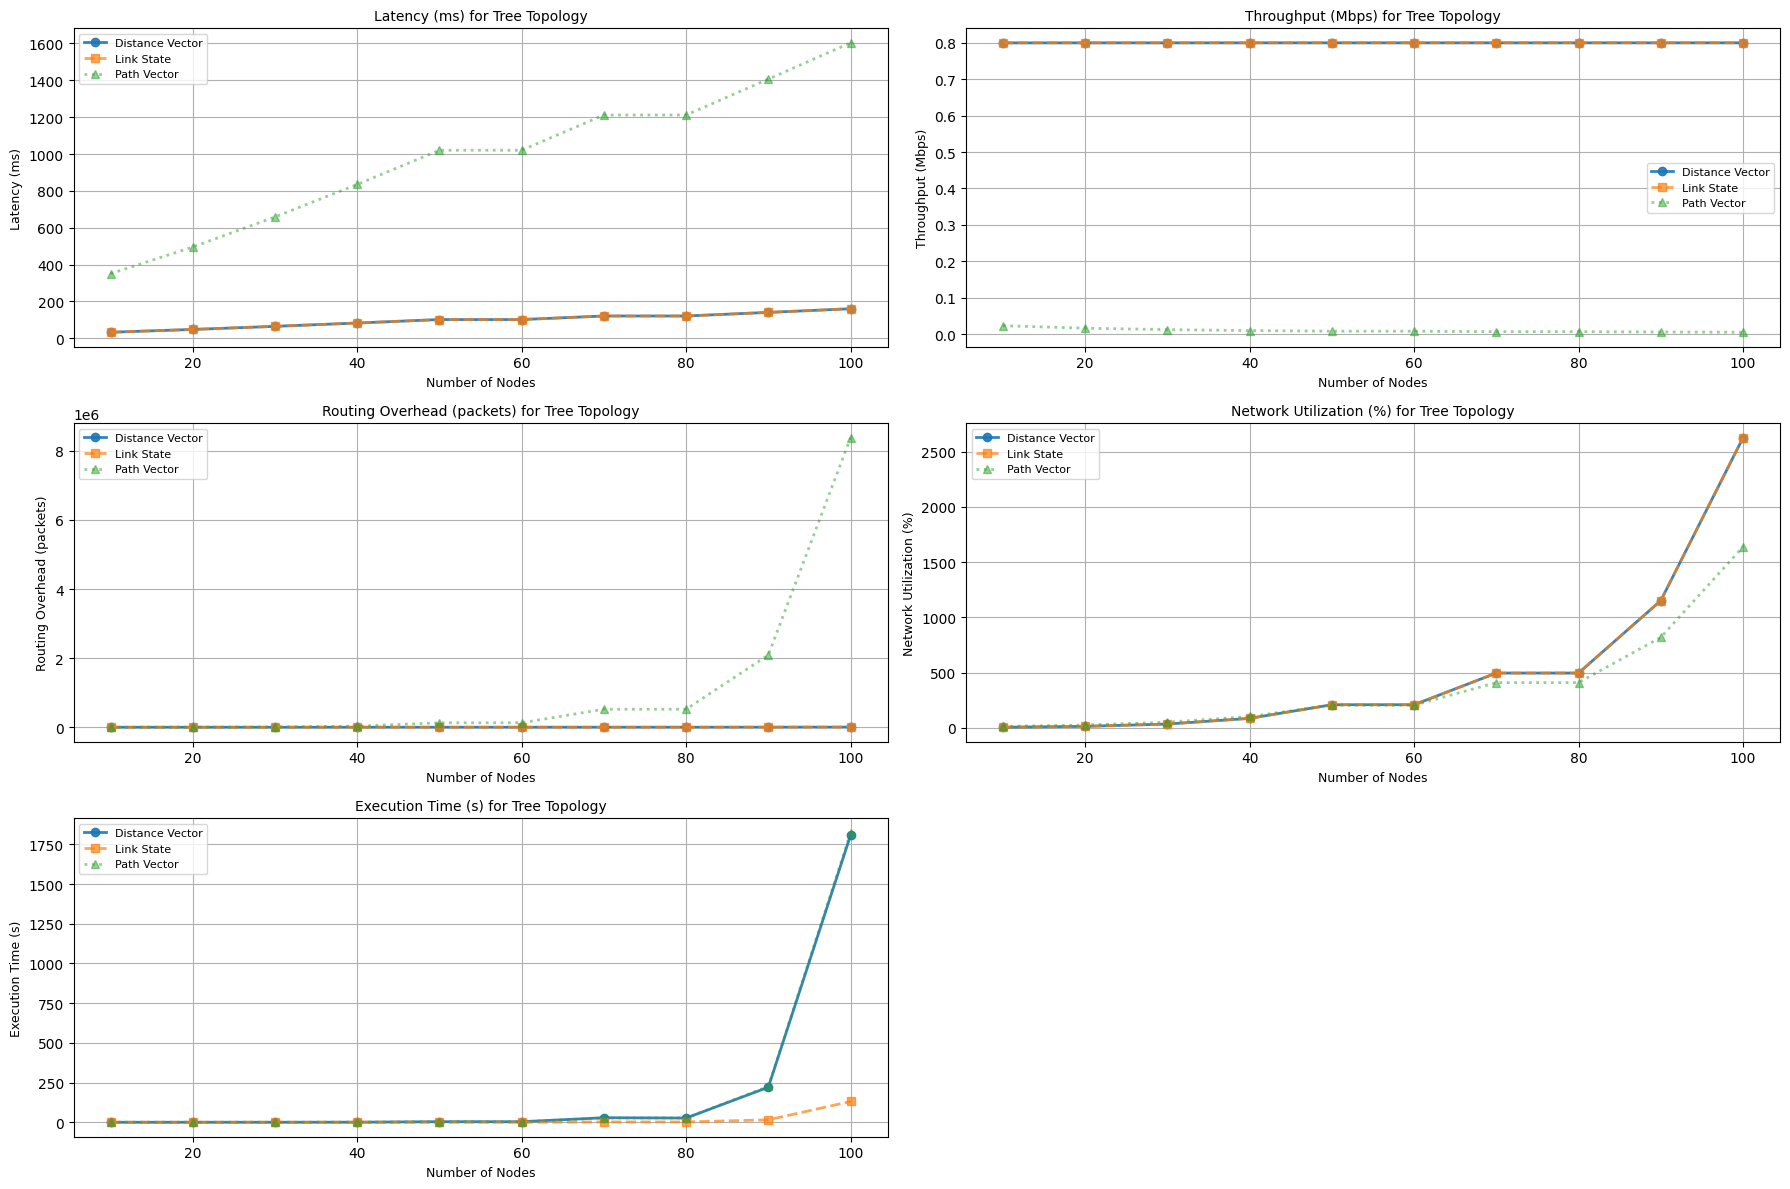

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
results_df = pd.read_csv("../routing_data/routing_algorithm_results.csv")

# Metrics to plot
METRICS = ["Latency (ms)", "Throughput (Mbps)", "Routing Overhead (packets)", "Network Utilization (%)", "Execution Time (s)"]

# Define unique line styles, transparency levels, and markers for each algorithm
LINE_STYLES = {
    "Distance Vector": "solid",    # Solid line
    "Link State": "dashed",        # Dashed line
    "Path Vector": "dotted"        # Dotted line
}

LINE_ALPHAS = {
    "Distance Vector": 0.9,   # Slightly more opaque
    "Link State": 0.7,        # Medium transparency
    "Path Vector": 0.5        # More transparent
}

MARKERS = {
    "Distance Vector": "o",  # Circle markers
    "Link State": "s",       # Square markers
    "Path Vector": "^"       # Triangle markers
}

# Function to plot 3x2 grid of metrics for each topology
def plot_metrics_grid(dataframe):
    topologies = dataframe['Topology'].unique()
    algorithms = dataframe['Algorithm'].unique()

    for topology in topologies:
        print(f"Generating plots for topology: {topology}")
        topology_data = dataframe[dataframe['Topology'] == topology]

        # Create a 3x2 grid for the 5 metrics
        fig, axes = plt.subplots(3, 2, figsize=(18, 12))
        axes = axes.flatten()  # Flatten axes for easier iteration
        
        for idx, metric in enumerate(METRICS):
            ax = axes[idx]
            for algorithm in algorithms:
                algo_data = topology_data[topology_data['Algorithm'] == algorithm]
                ax.plot(
                    algo_data["Number of Nodes"], 
                    algo_data[metric], 
                    label=algorithm, 
                    linestyle=LINE_STYLES.get(algorithm, "solid"),  # Apply line style
                    alpha=LINE_ALPHAS.get(algorithm, 0.8),          # Apply transparency
                    marker=MARKERS.get(algorithm, "o"),            # Apply marker style
                    markersize=6,                                  # Marker size
                    linewidth=2
                )

            # Customize each subplot
            ax.set_title(f"{metric} for {topology.capitalize()} Topology", fontsize=10)
            ax.set_xlabel("Number of Nodes", fontsize=9)
            ax.set_ylabel(metric, fontsize=9)
            ax.legend(fontsize=8)
            ax.grid(True)

        # Remove the last empty subplot (if any)
        if len(METRICS) < len(axes):
            fig.delaxes(axes[-1])  # Remove last empty subplot

        # Adjust layout and save the figure
        plt.tight_layout()
        plt.savefig(f"{topology}_metrics_comparison_grid.png")
        plt.show()

# Call the function
plot_metrics_grid(results_df)


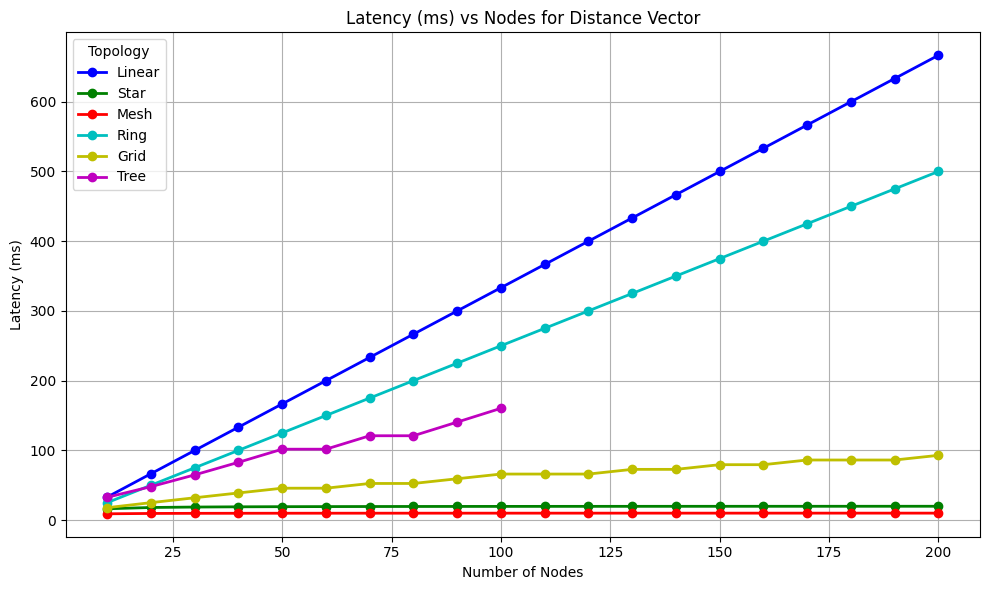

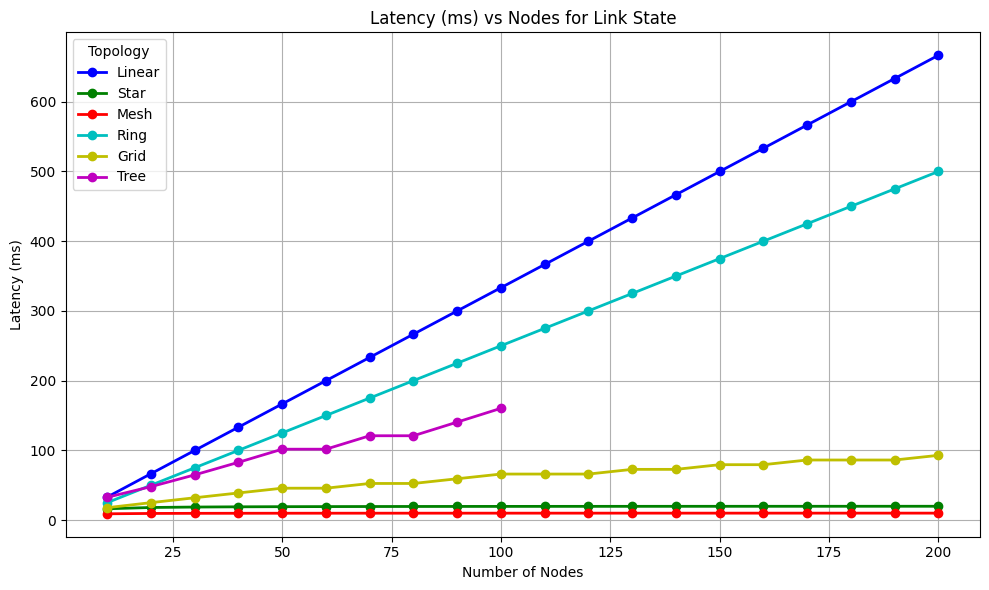

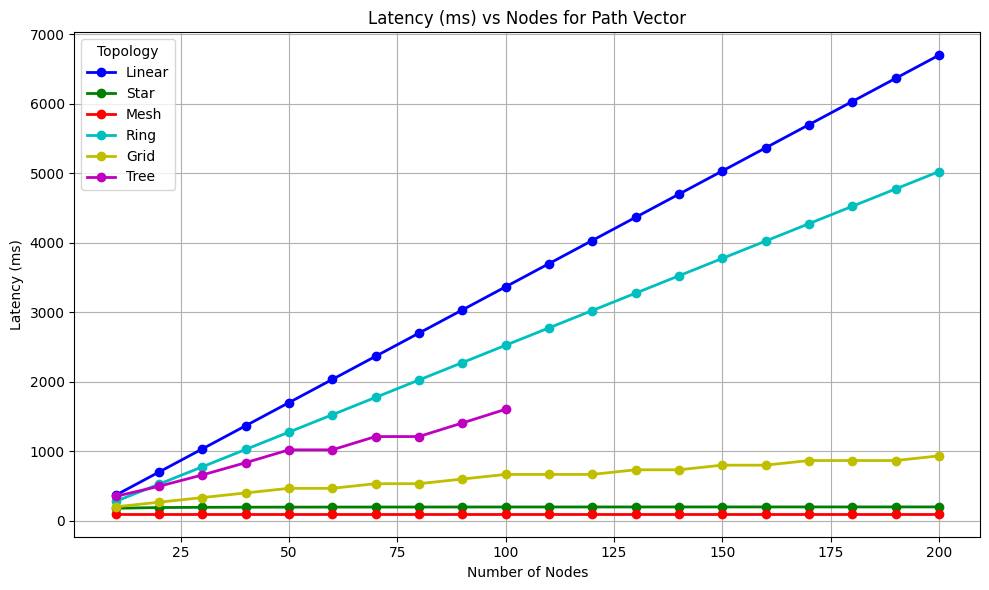

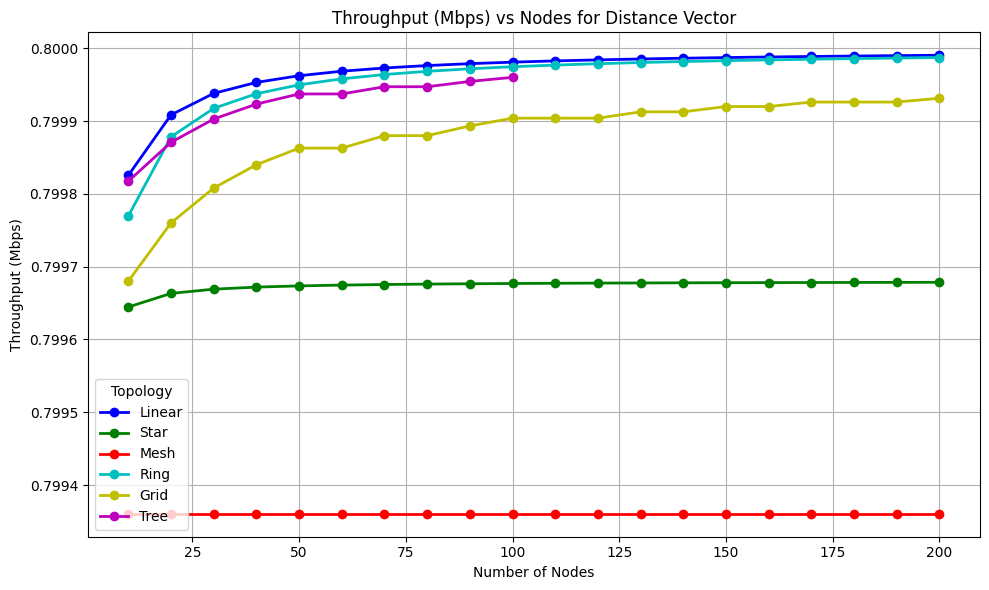

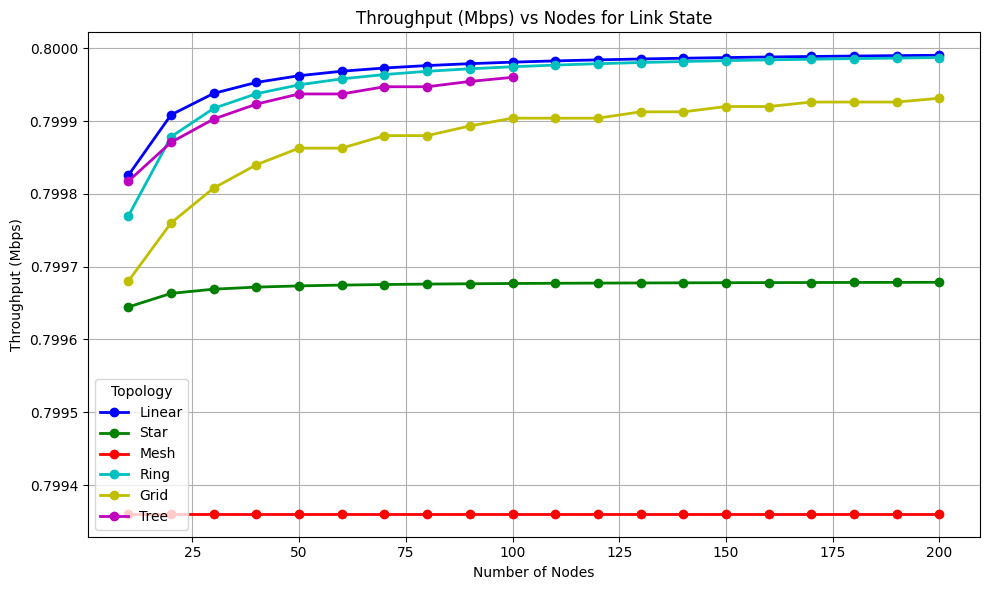

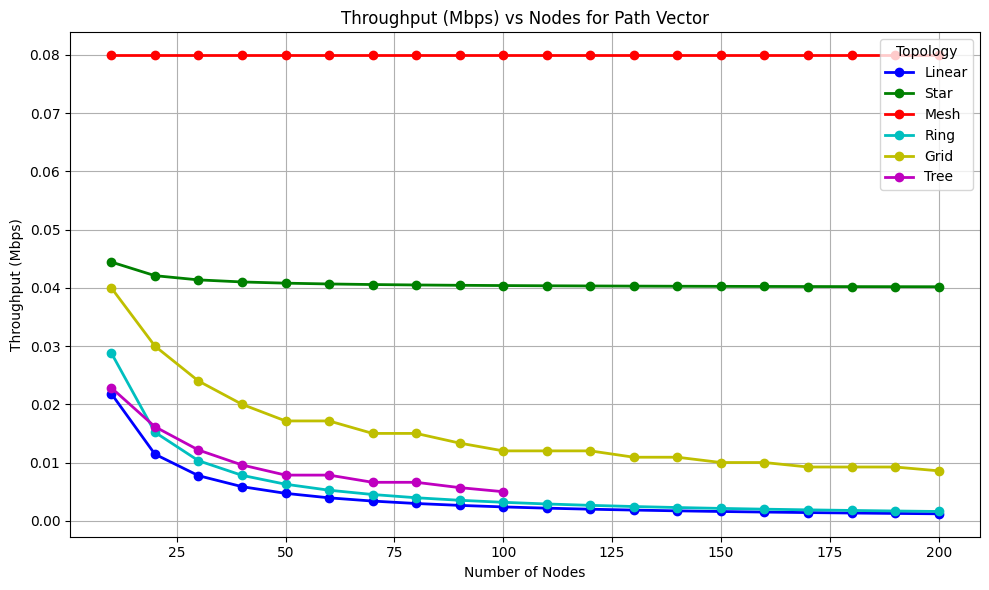

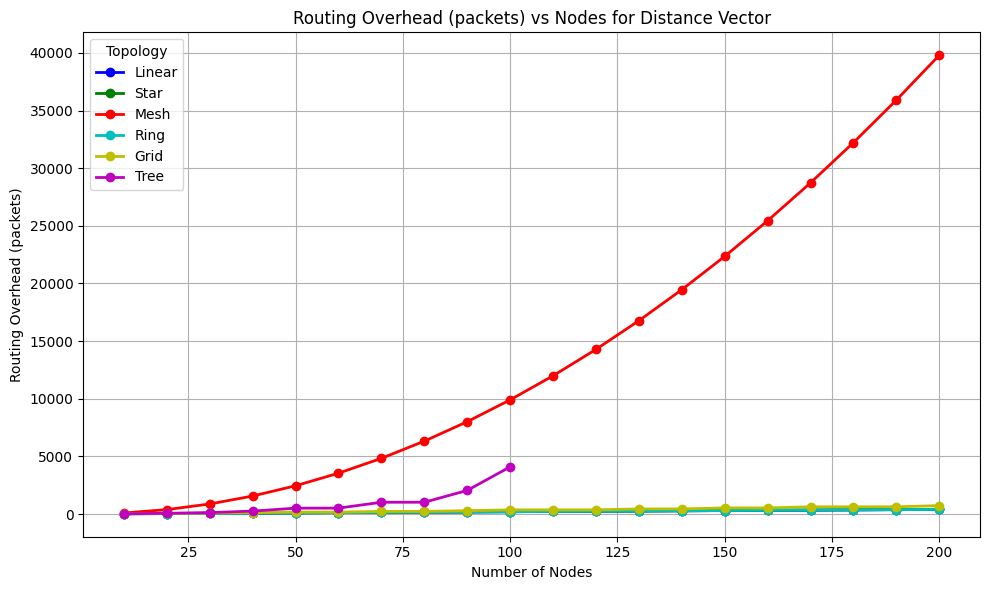

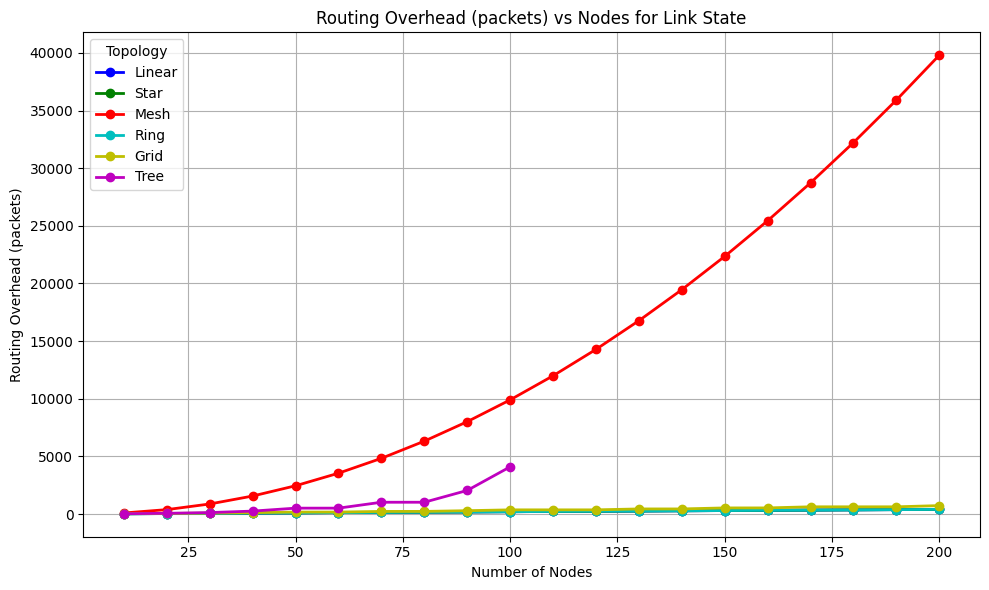

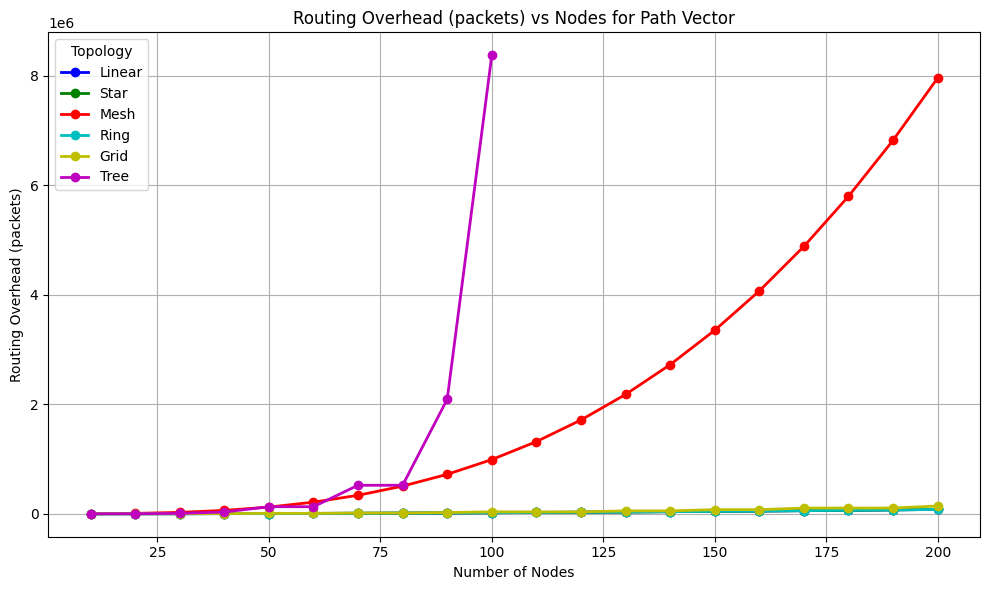

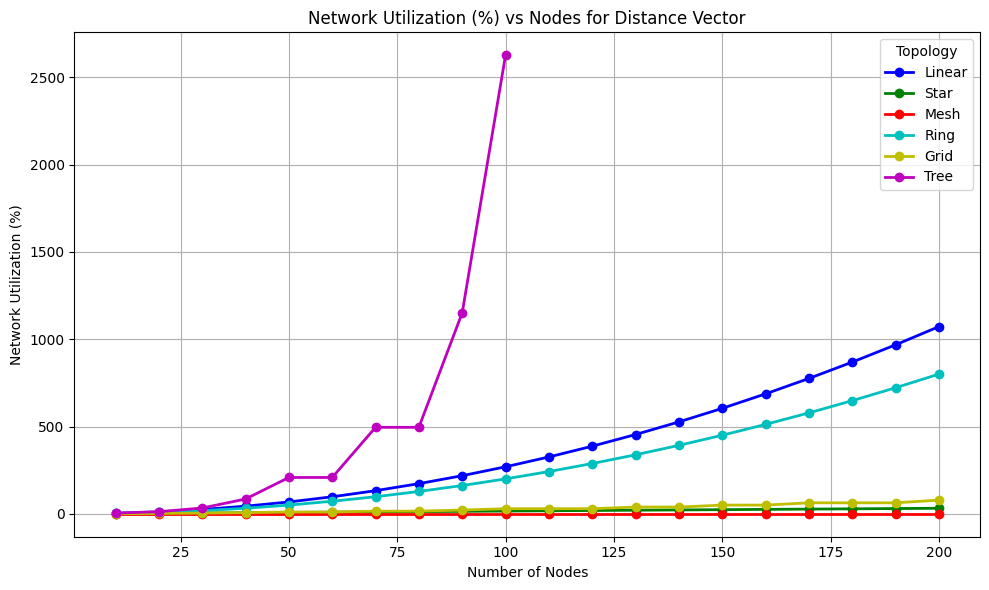

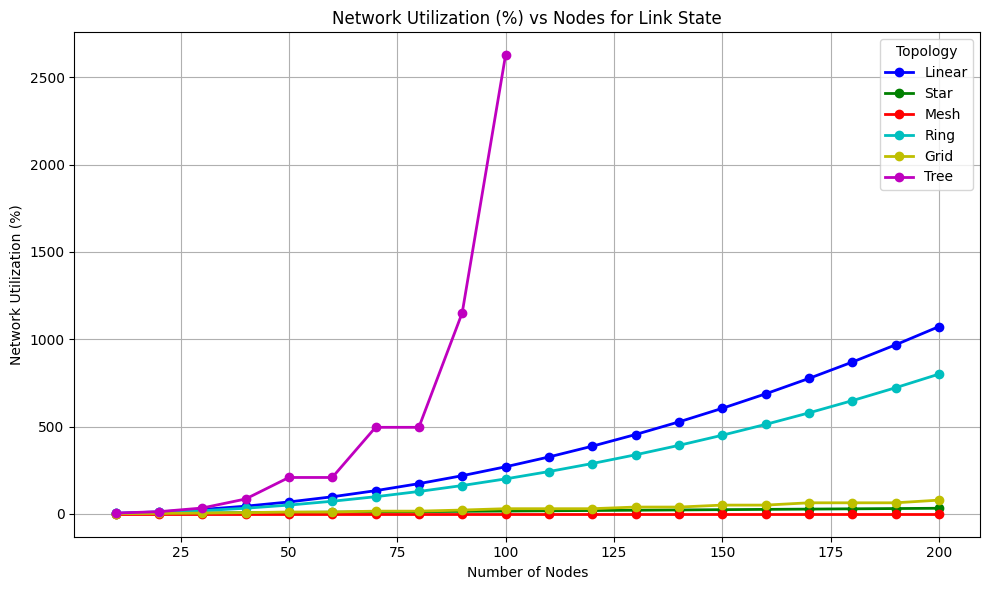

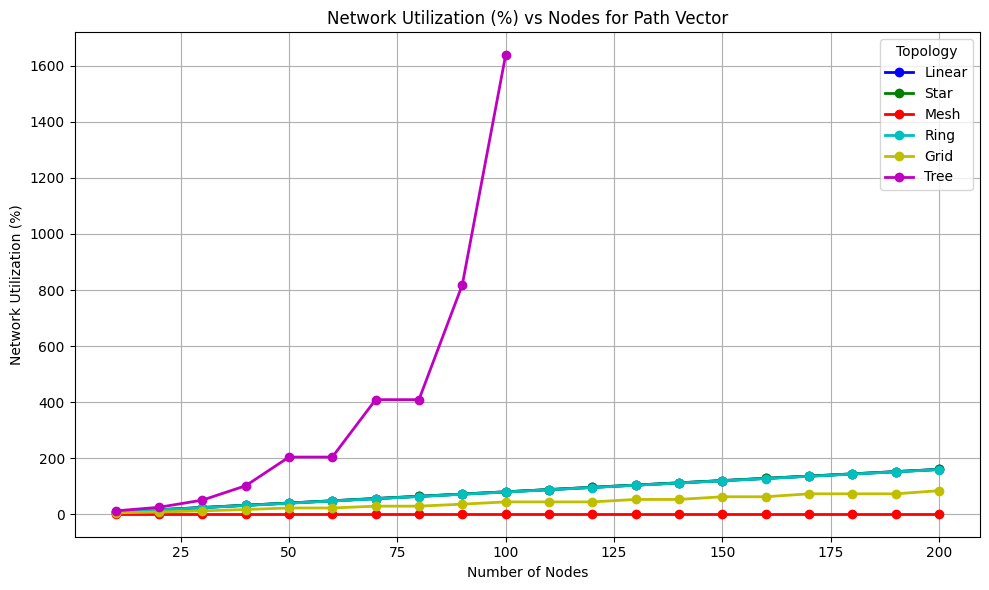

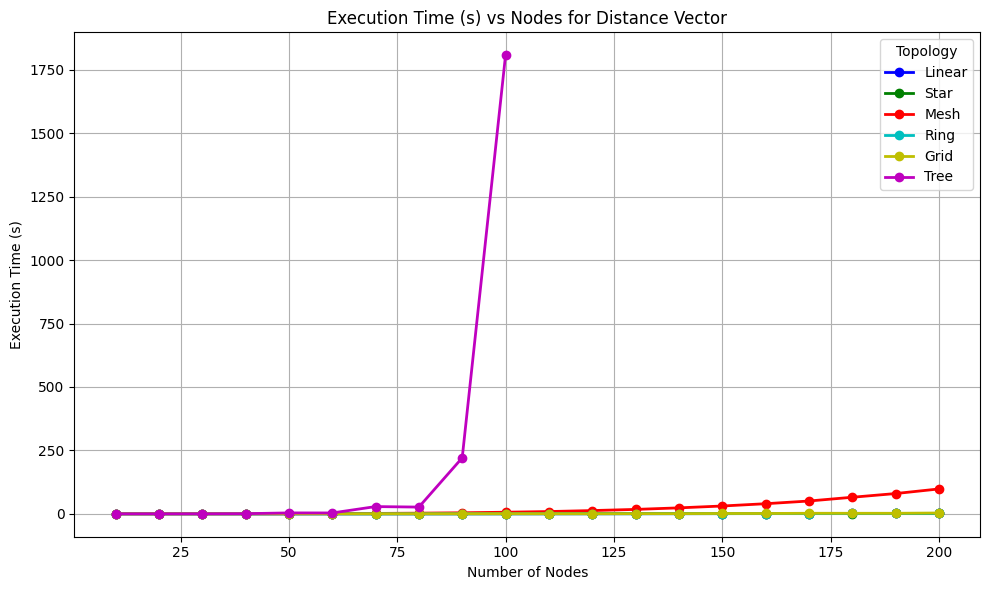

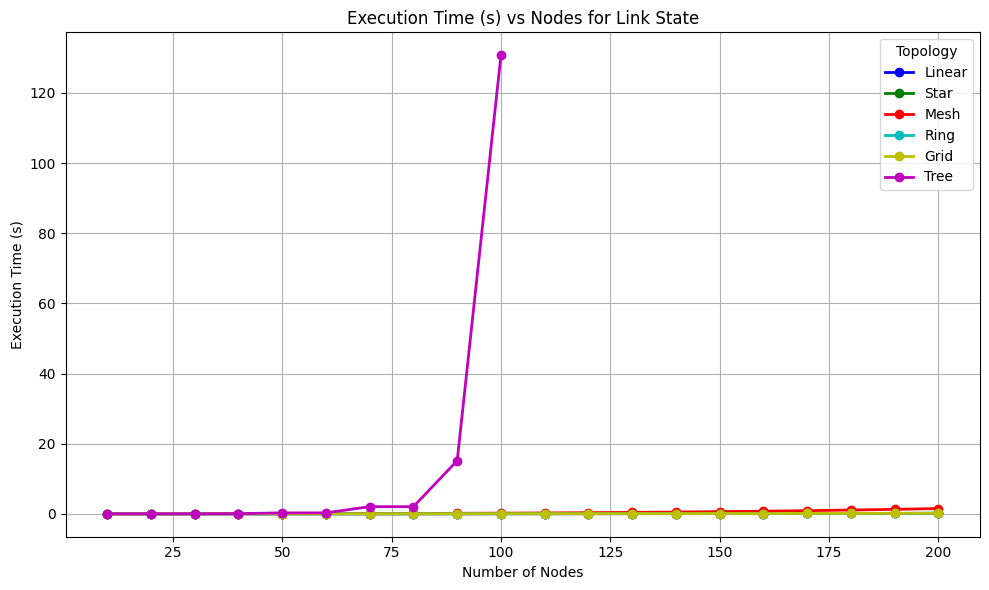

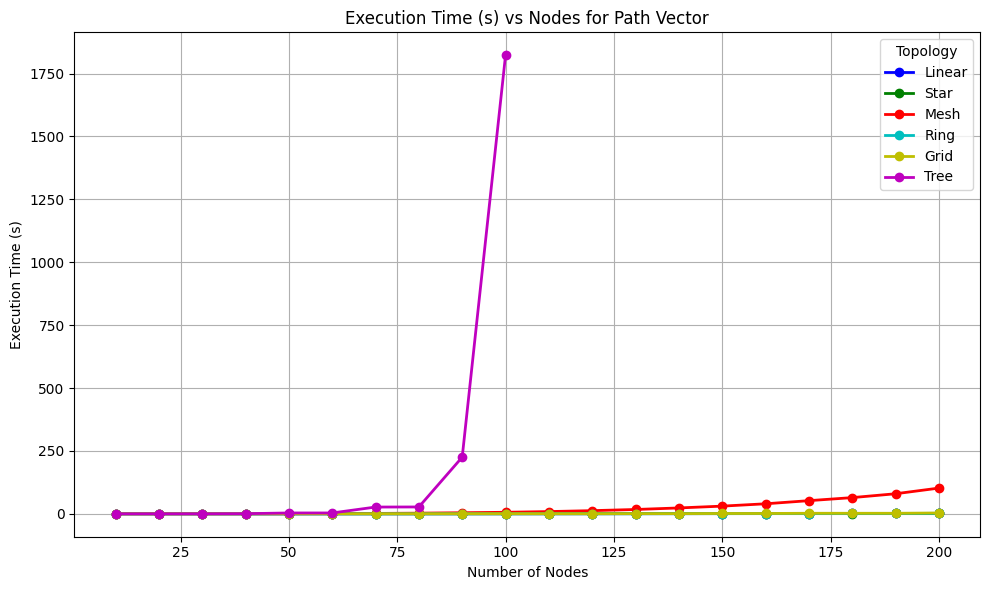

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
results_df = pd.read_csv("../routing_data/routing_algorithm_results.csv")

# Metrics to plot
METRICS = ["Latency (ms)", "Throughput (Mbps)", "Routing Overhead (packets)", "Network Utilization (%)", "Execution Time (s)"]
TOPOLOGIES = results_df['Topology'].unique()
ALGORITHMS = results_df['Algorithm'].unique()

# Colors for each topology
TOPOLOGY_COLORS = {
    "linear": "b",   # Blue
    "star": "g",     # Green
    "mesh": "r",     # Red
    "ring": "c",     # Cyan
    "tree": "m",     # Magenta
    "grid": "y"      # Yellow
}

# Function to plot metric vs. nodes for each algorithm
def plot_algorithm_performance(dataframe, metric):
    for algorithm in ALGORITHMS:
        plt.figure(figsize=(10, 6))
        algo_data = dataframe[dataframe['Algorithm'] == algorithm]

        for topology in TOPOLOGIES:
            topo_data = algo_data[algo_data['Topology'] == topology]
            plt.plot(
                topo_data['Number of Nodes'], 
                topo_data[metric], 
                label=topology.capitalize(), 
                color=TOPOLOGY_COLORS.get(topology, "k"),  # Default to black if no color
                linewidth=2,
                marker="o"  # Circle markers for clarity
            )

        # Customize plot
        plt.title(f"{metric} vs Nodes for {algorithm}")
        plt.xlabel("Number of Nodes")
        plt.ylabel(metric)
        plt.legend(title="Topology")
        plt.grid(True)
        plt.tight_layout()

        # Save the plot
        plt.savefig(f"{algorithm.replace(' ', '_')}_{metric.replace(' ', '_').replace('(', '').replace(')', '')}.png")
        plt.show()

# Call the function for each metric
for metric in METRICS:
    plot_algorithm_performance(results_df, metric)


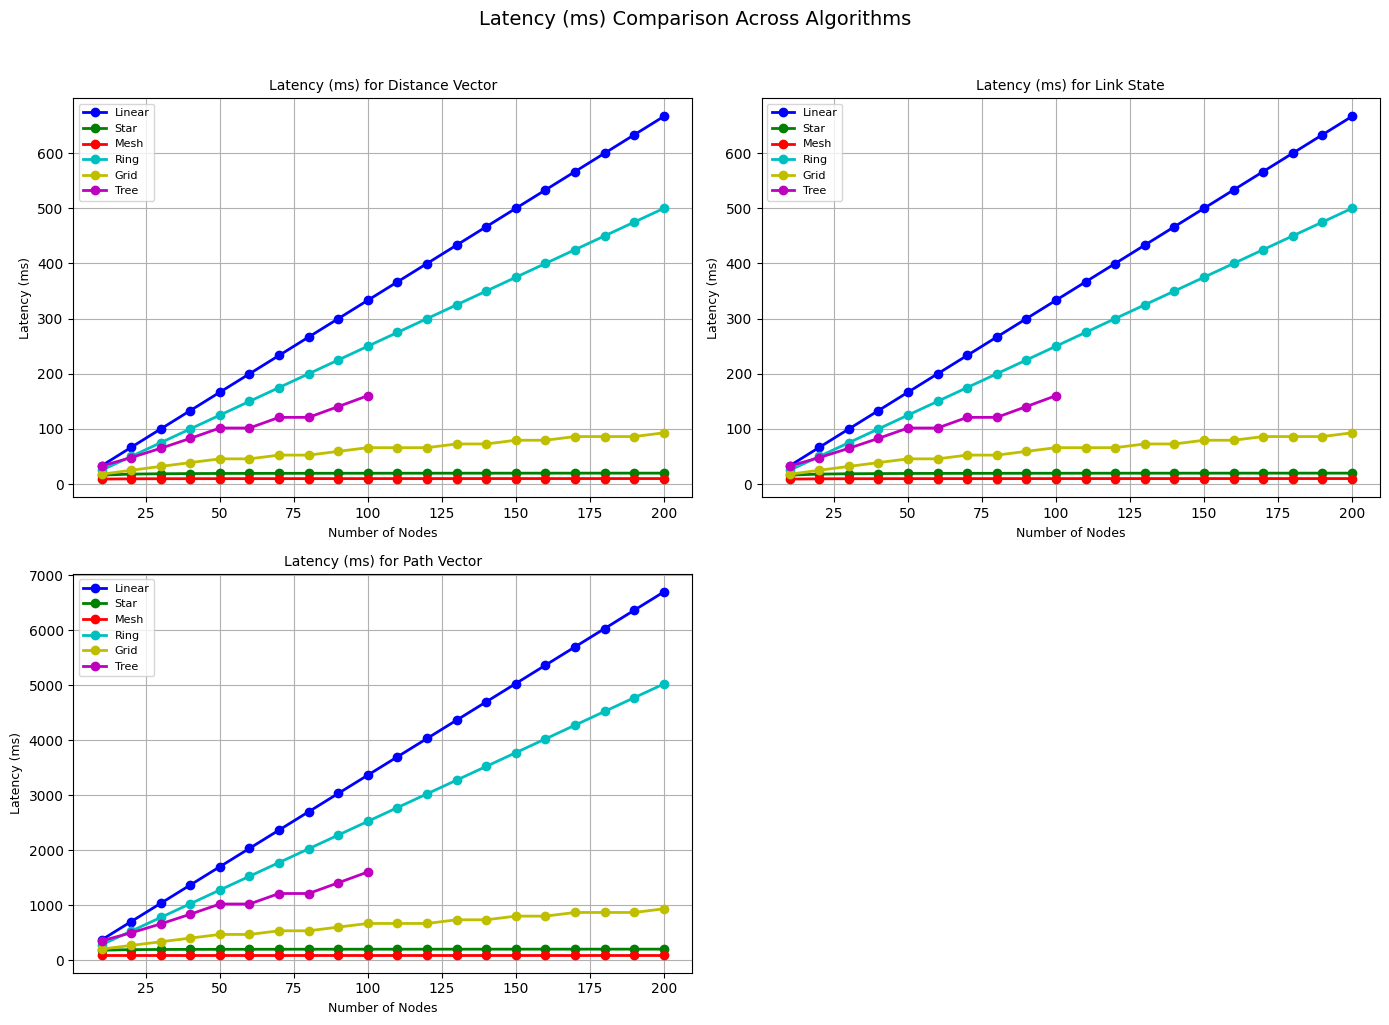

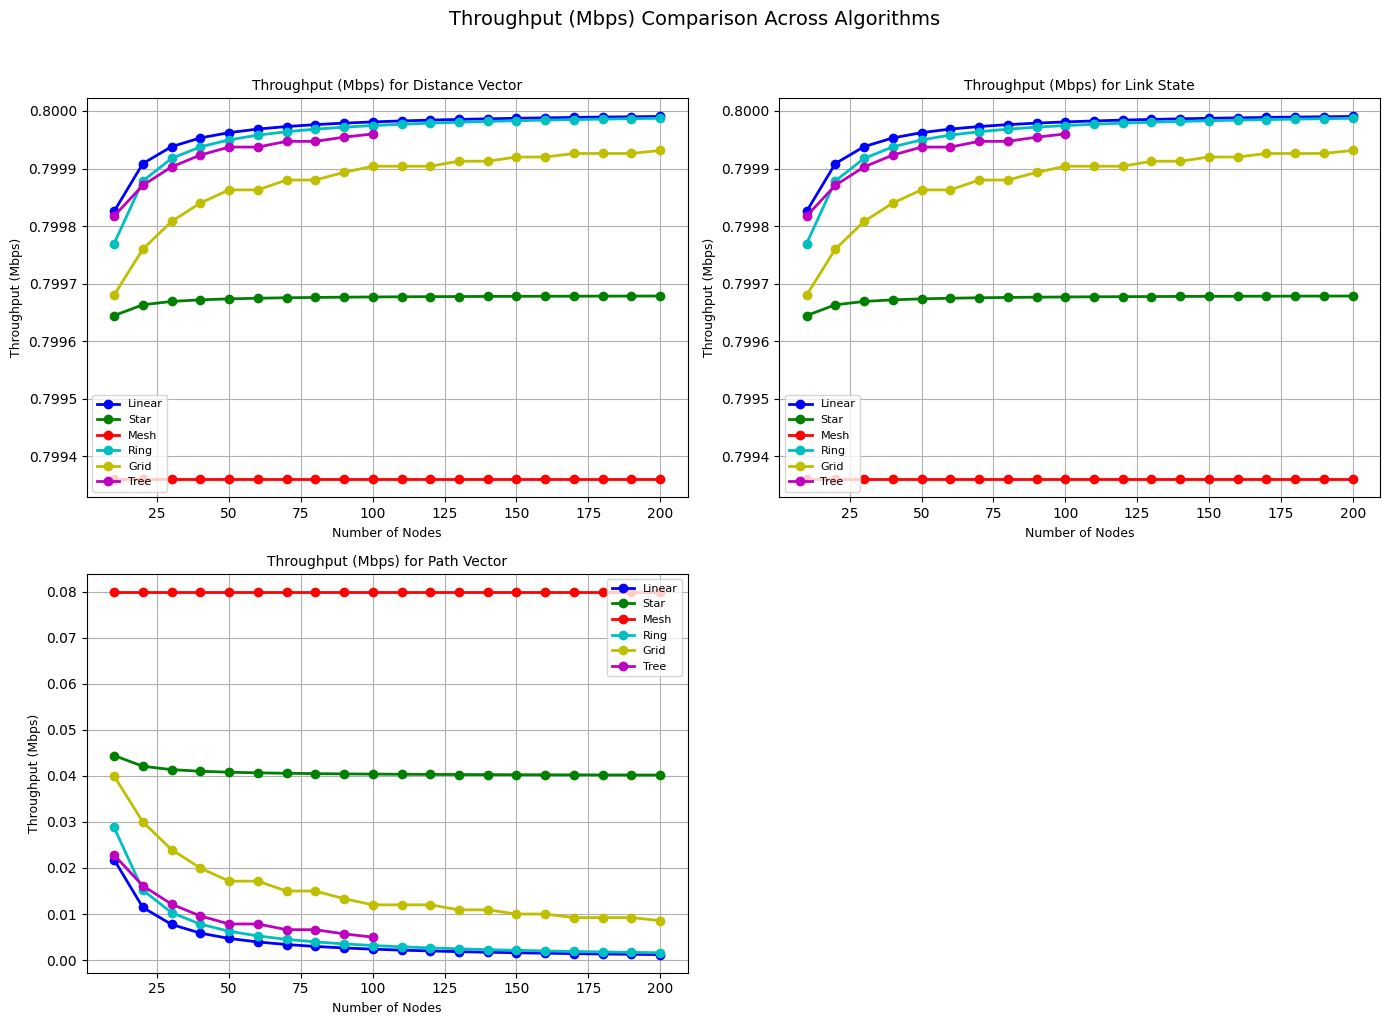

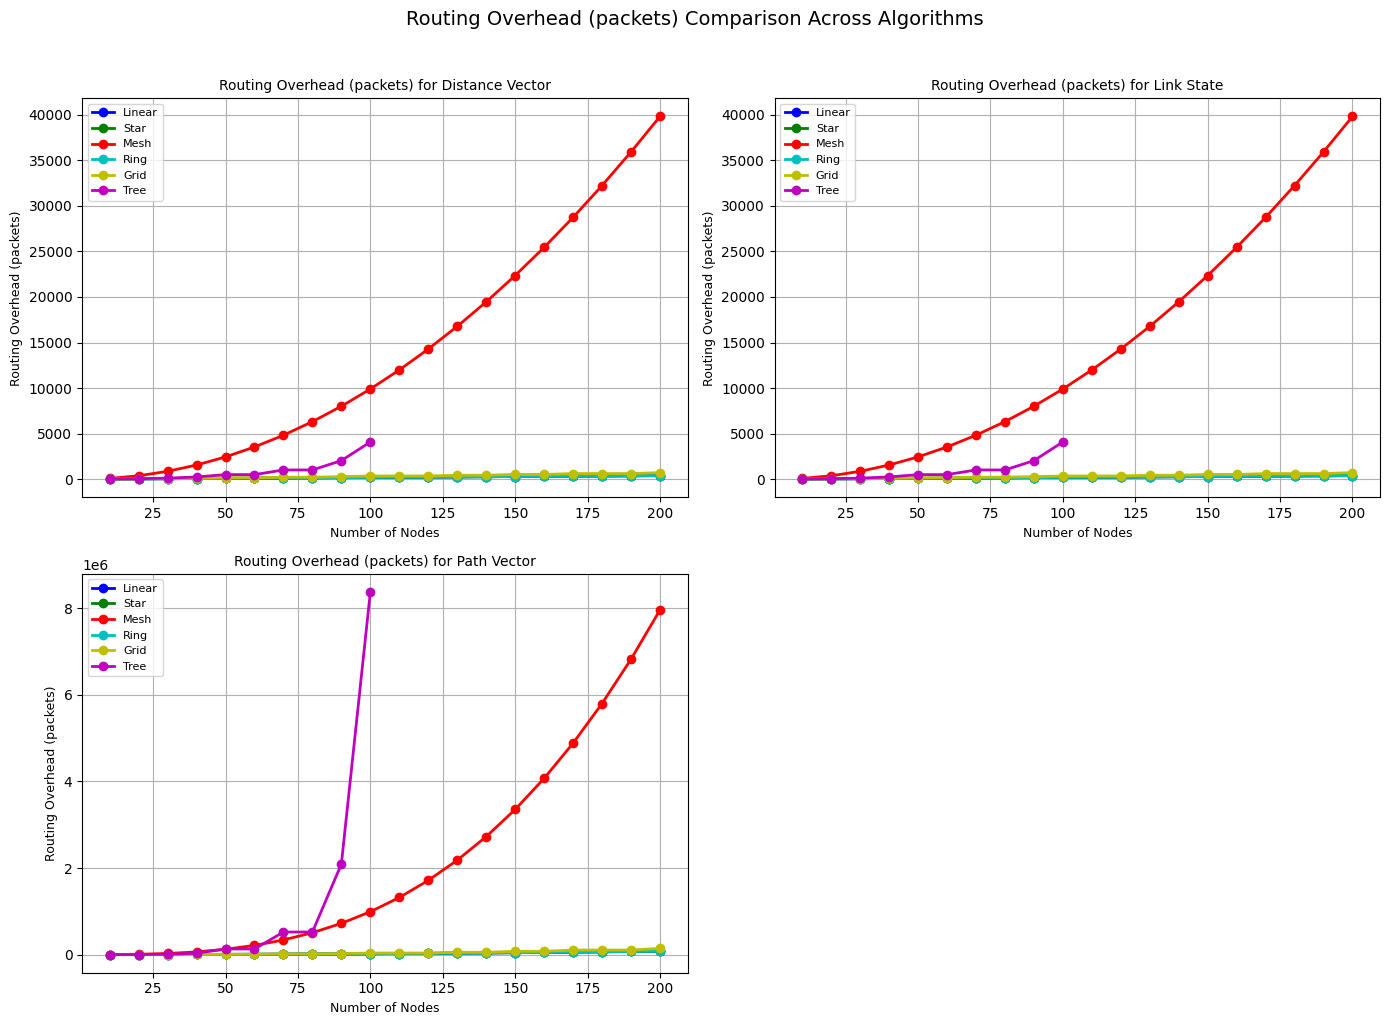

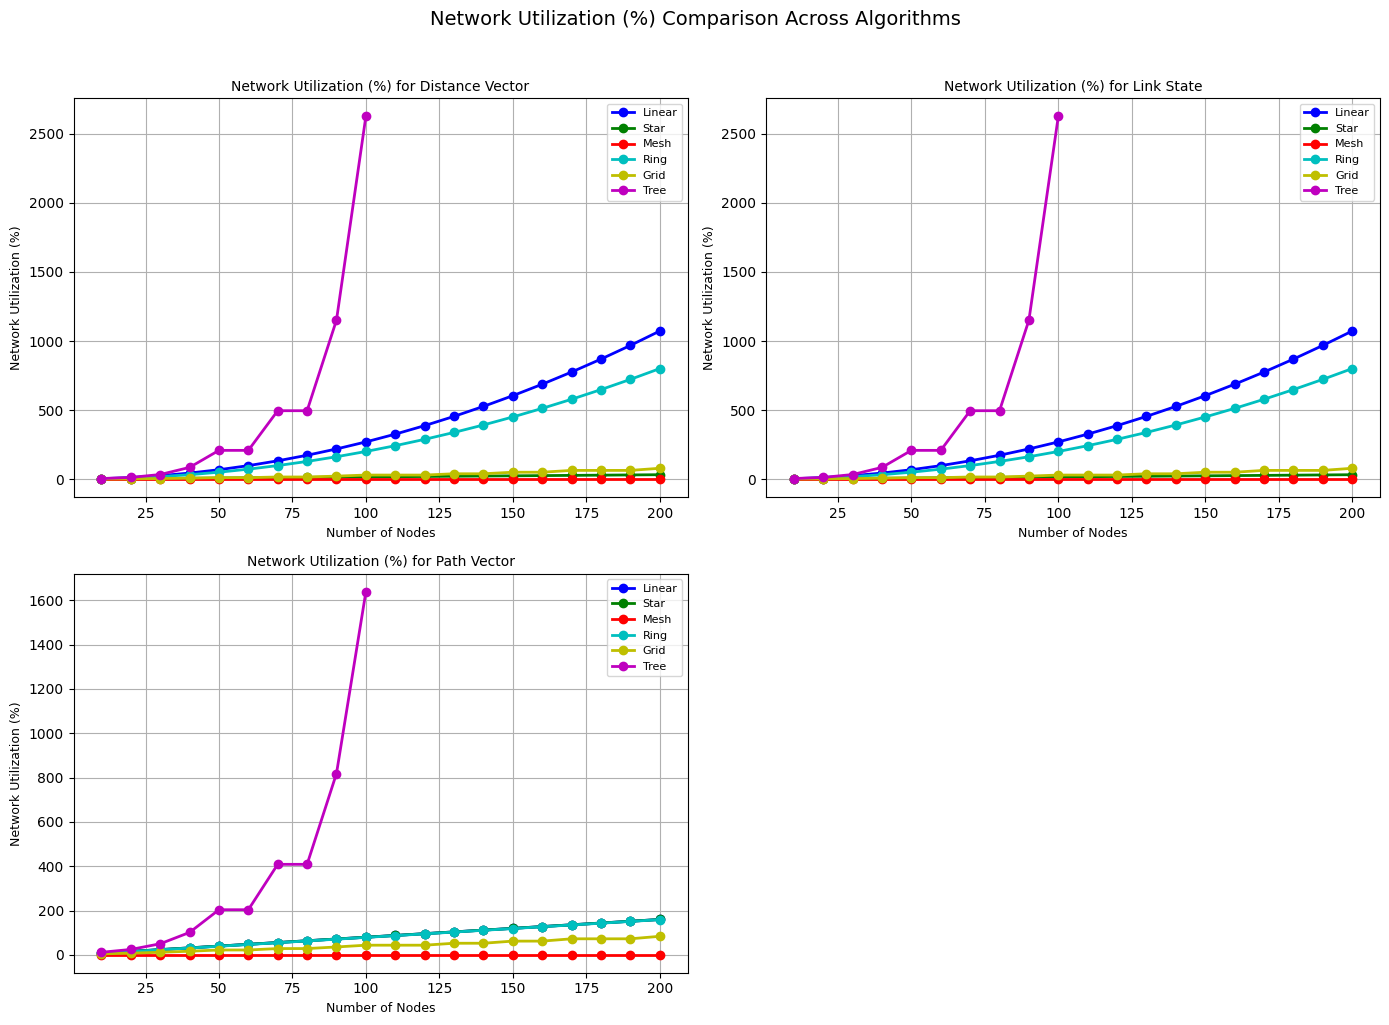

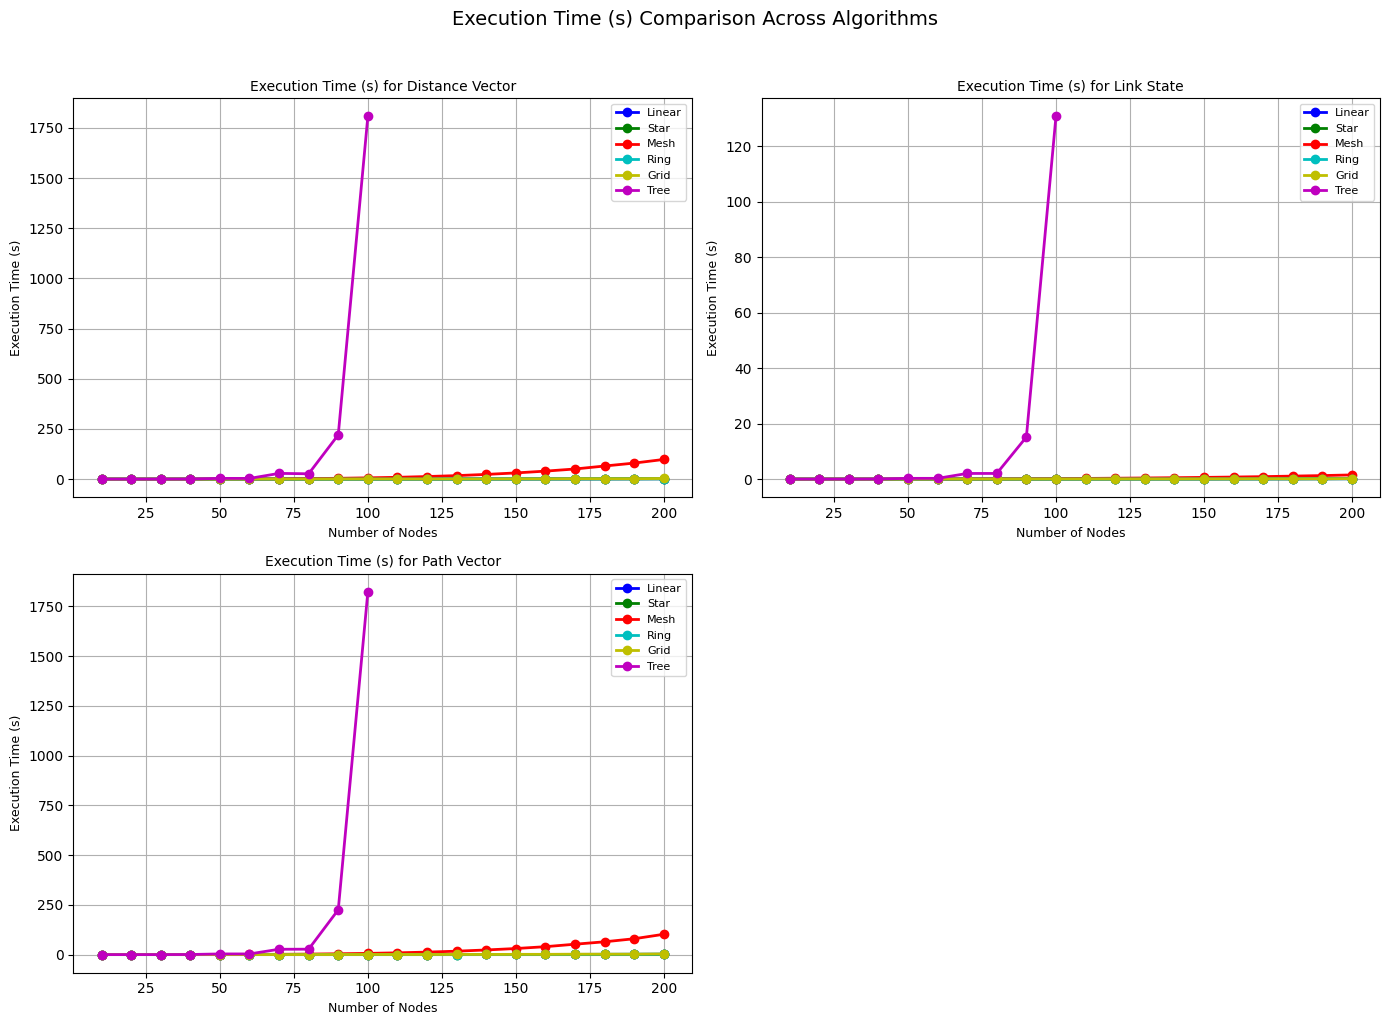

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
results_df = pd.read_csv("../routing_data/routing_algorithm_results.csv")

# Metrics to plot
METRICS = ["Latency (ms)", "Throughput (Mbps)", "Routing Overhead (packets)", "Network Utilization (%)", "Execution Time (s)"]
TOPOLOGIES = results_df['Topology'].unique()
ALGORITHMS = ["Distance Vector", "Link State", "Path Vector"]

# Colors for each topology
TOPOLOGY_COLORS = {
    "linear": "b",   # Blue
    "star": "g",     # Green
    "mesh": "r",     # Red
    "ring": "c",     # Cyan
    "tree": "m",     # Magenta
    "grid": "y"      # Yellow
}

# Grid positions for each algorithm
GRID_POSITIONS = {
    "Distance Vector": (0, 0),  # Row 1, Col 1
    "Link State": (0, 1),       # Row 1, Col 2
    "Path Vector": (1, 0)       # Row 2, Col 1
}

# Function to plot all metrics for all algorithms on a 2x2 grid
def plot_all_metrics_grid(dataframe):
    for metric in METRICS:
        # Create a 2x2 grid figure for the current metric
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust space between plots
        
        # Flatten axes and turn off all initially
        axes_flat = axes.flatten()
        for ax in axes_flat:
            ax.axis("off")
        
        # Plot for each algorithm in its designated grid position
        for algorithm, (row, col) in GRID_POSITIONS.items():
            ax = axes[row, col]
            ax.axis("on")  # Turn on the axes for active subplots
            algo_data = dataframe[dataframe['Algorithm'] == algorithm]

            for topology in TOPOLOGIES:
                topo_data = algo_data[algo_data['Topology'] == topology]
                ax.plot(
                    topo_data["Number of Nodes"], 
                    topo_data[metric], 
                    label=topology.capitalize(), 
                    color=TOPOLOGY_COLORS.get(topology, "k"),  # Default to black if no color
                    linewidth=2, 
                    marker="o", 
                    markersize=6
                )

            # Customize the subplot
            ax.set_title(f"{metric} for {algorithm}", fontsize=10)
            ax.set_xlabel("Number of Nodes", fontsize=9)
            ax.set_ylabel(metric, fontsize=9)
            ax.legend(fontsize=8)
            ax.grid(True)

        # Add a main title for the current metric
        fig.suptitle(f"{metric} Comparison Across Algorithms", fontsize=14, y=1.02)

        # Save and show the figure
        plt.tight_layout()
        plt.savefig(f"{metric.replace(' ', '_').replace('(', '').replace(')', '')}_2x2_grid.png", bbox_inches="tight")
        plt.show()

# Call the function to plot all metrics
plot_all_metrics_grid(results_df)


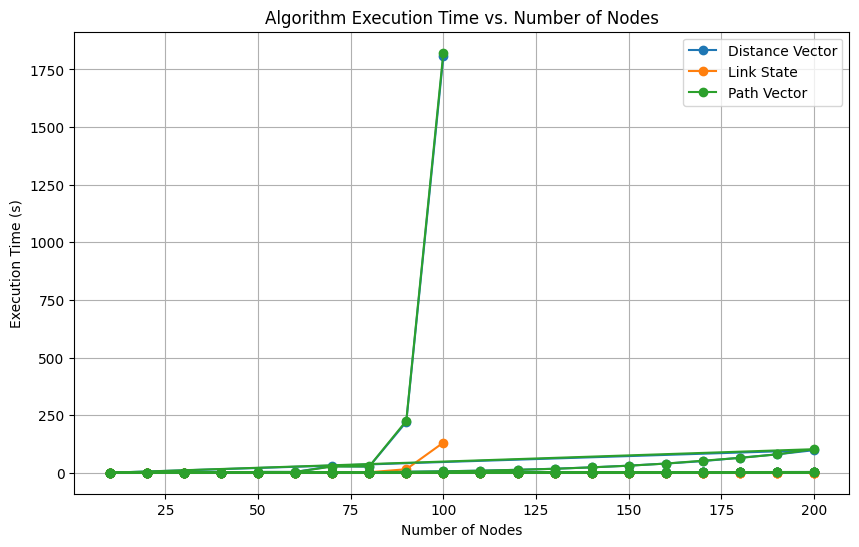

In [30]:
def plot_execution_time(dataframe):
    plt.figure(figsize=(10, 6))
    algorithms = dataframe['Algorithm'].unique()

    for algorithm in algorithms:
        algo_data = dataframe[dataframe['Algorithm'] == algorithm]
        plt.plot(algo_data["Number of Nodes"], algo_data["Execution Time (s)"], label=algorithm, marker='o')

    plt.title("Algorithm Execution Time vs. Number of Nodes")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Execution Time (s)")
    plt.legend()
    plt.grid(True)
    plt.savefig("execution_time_comparison.png")
    plt.show()

# Call function
plot_execution_time(results_df)

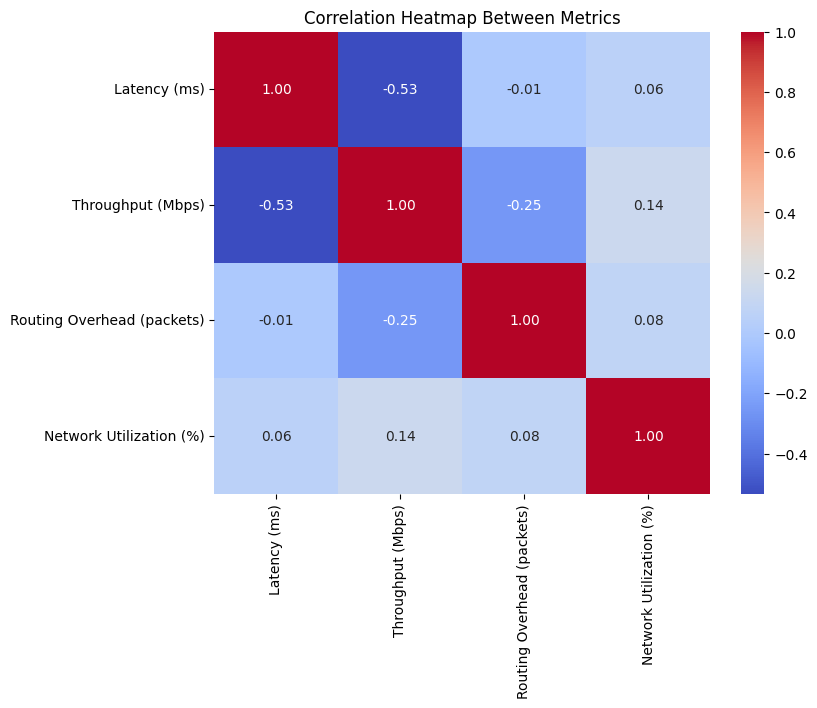

In [31]:
import seaborn as sns

def plot_correlation_heatmap(dataframe):
    plt.figure(figsize=(8, 6))
    correlation_data = dataframe[["Latency (ms)", "Throughput (Mbps)", "Routing Overhead (packets)", "Network Utilization (%)"]]
    corr = correlation_data.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap Between Metrics")
    plt.savefig("correlation_heatmap.png")
    plt.show()

# Call function
plot_correlation_heatmap(results_df)


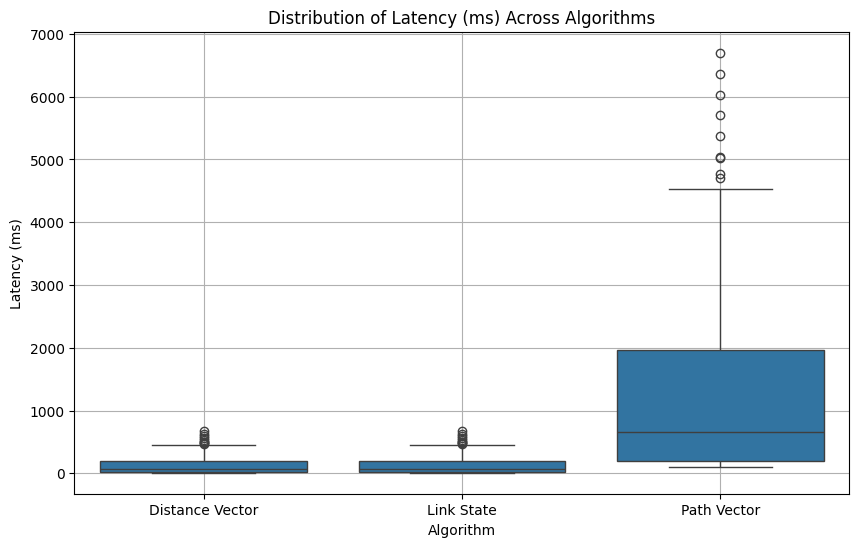

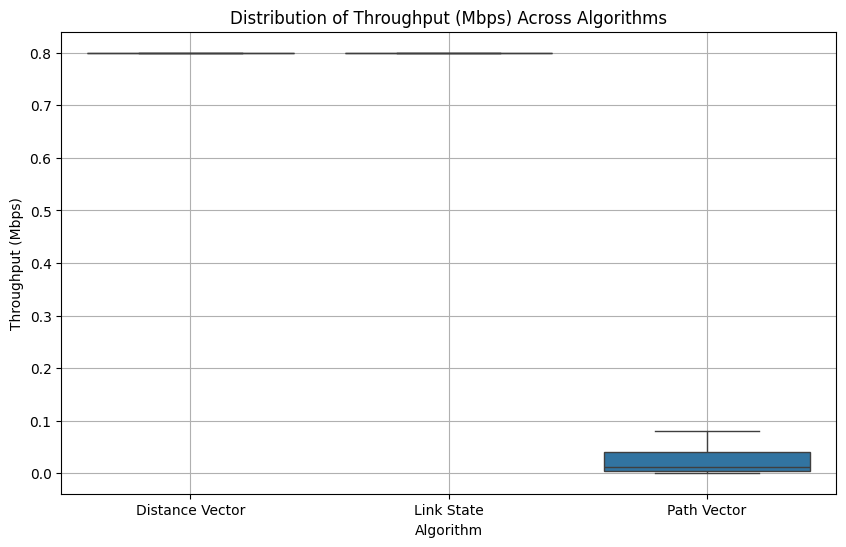

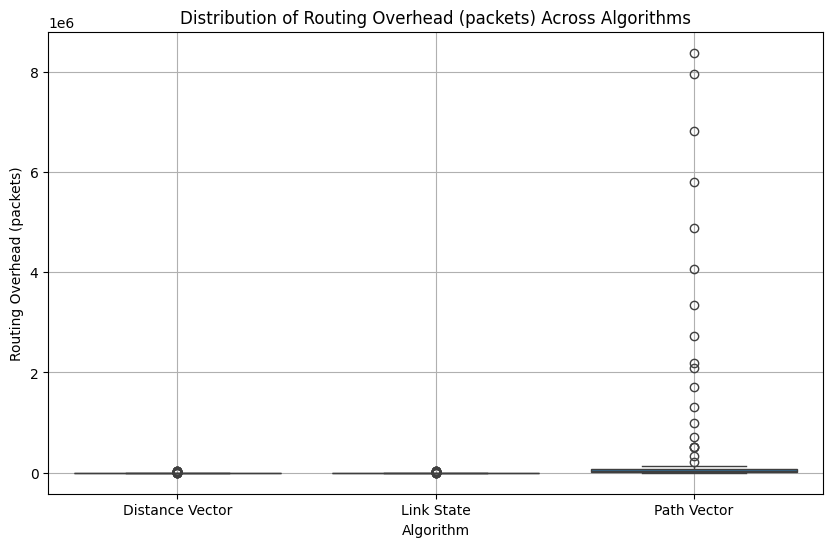

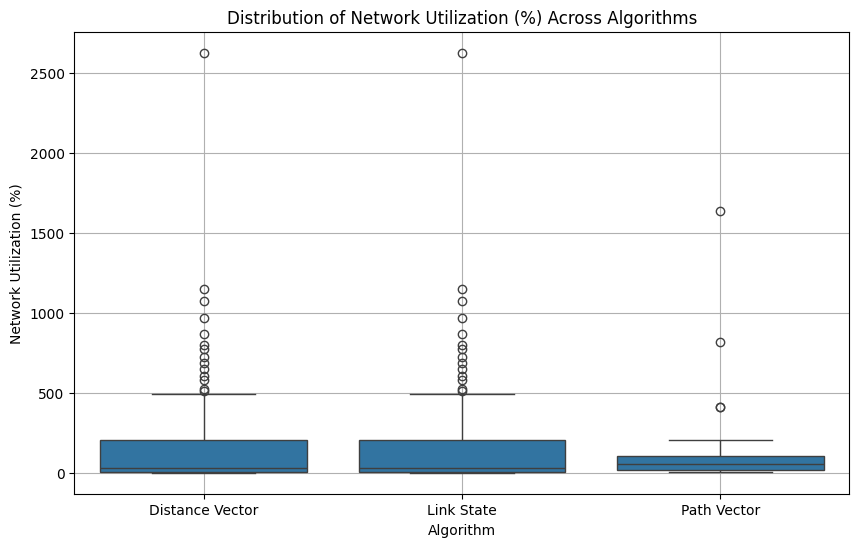

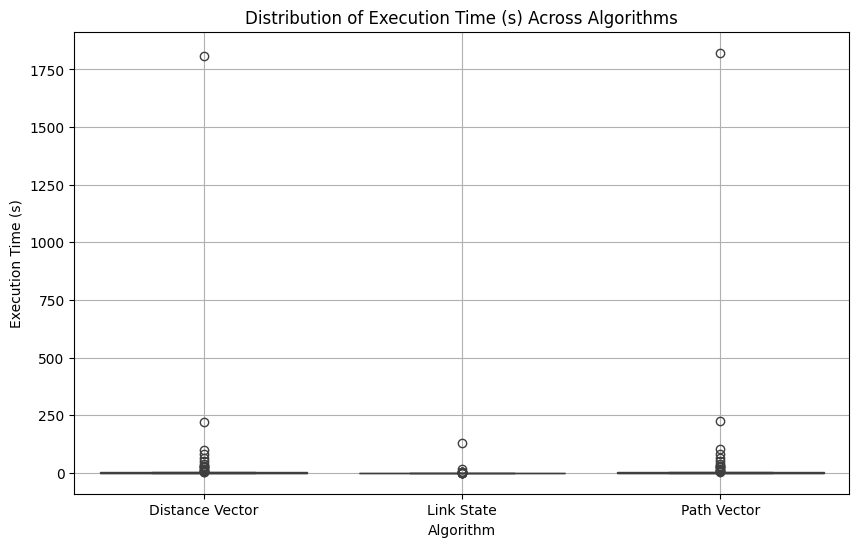

In [32]:
def plot_metric_distributions(dataframe, metric):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Algorithm", y=metric, data=dataframe)
    plt.title(f"Distribution of {metric} Across Algorithms")
    plt.xlabel("Algorithm")
    plt.ylabel(metric)
    plt.grid(True)
    plt.savefig(f"{metric.replace(' ', '_')}_distribution.png")
    plt.show()

# Call function for each metric
for metric in METRICS:
    plot_metric_distributions(results_df, metric)


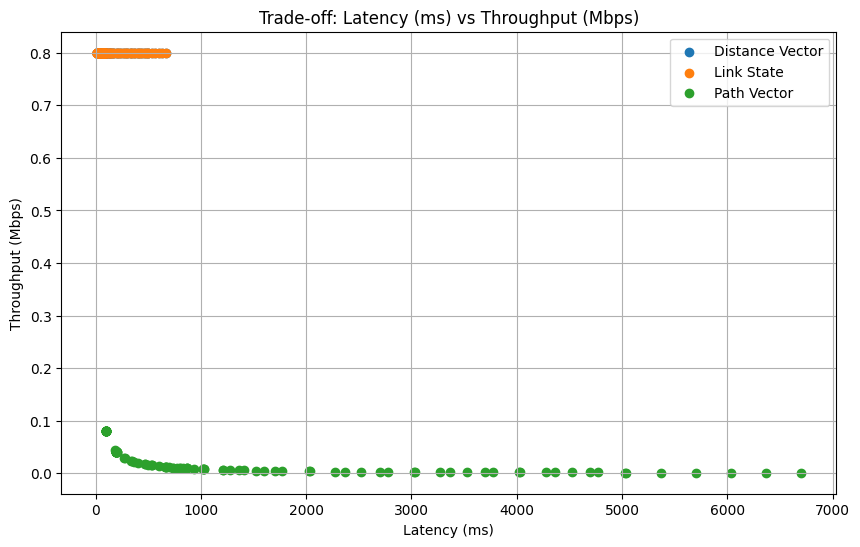

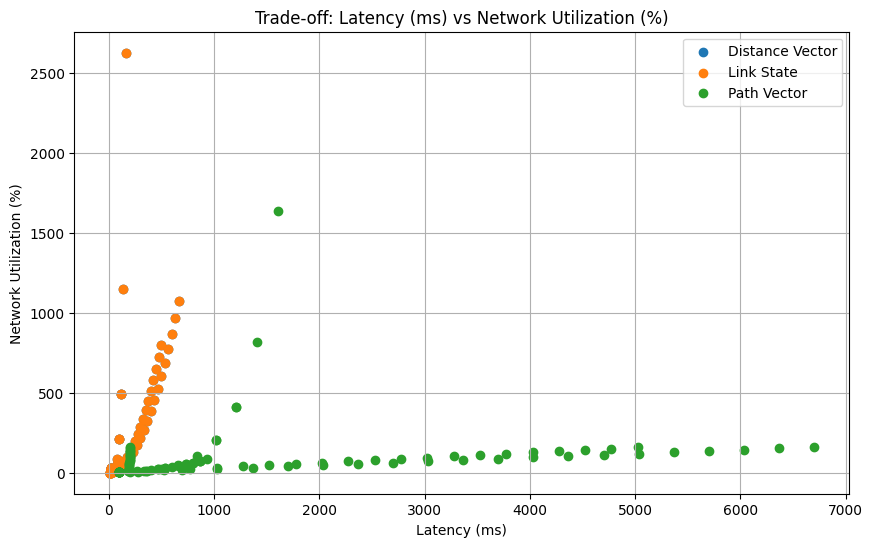

In [35]:
def tradeoff_scatter_plot(dataframe, x_metric, y_metric):
    plt.figure(figsize=(10, 6))
    algorithms = dataframe['Algorithm'].unique()

    for algorithm in algorithms:
        algo_data = dataframe[dataframe['Algorithm'] == algorithm]
        plt.scatter(algo_data[x_metric], algo_data[y_metric], label=algorithm)

    plt.title(f"Trade-off: {x_metric} vs {y_metric}")
    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"tradeoff_{x_metric.replace(' ', '_')}_vs_{y_metric.replace(' ', '_')}.png")
    plt.show()

# Example: Plot latency vs throughput
tradeoff_scatter_plot(results_df, "Latency (ms)", "Throughput (Mbps)")
tradeoff_scatter_plot(results_df, "Latency (ms)", "Network Utilization (%)")
# "Routing Overhead (packets)", "Network Utilization (%)", "Execution Time (s)"




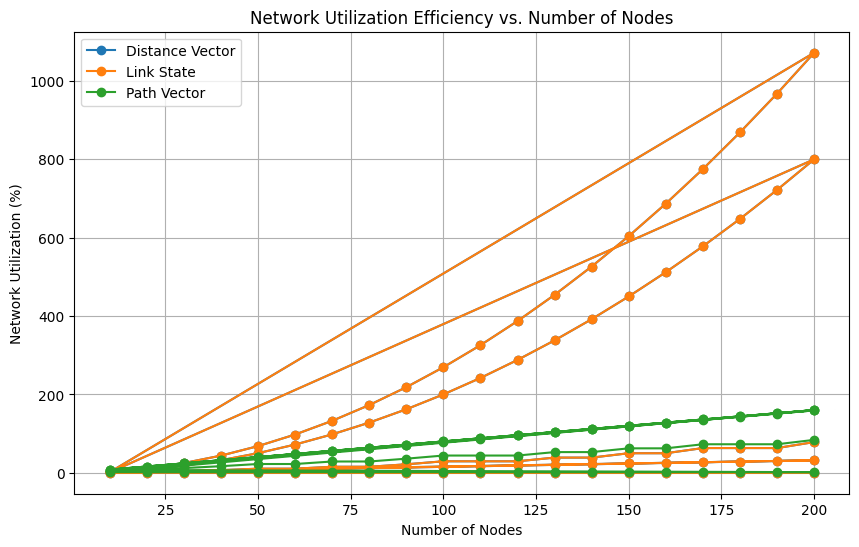

In [24]:
def plot_utilization_efficiency(dataframe):
    plt.figure(figsize=(10, 6))
    algorithms = dataframe['Algorithm'].unique()

    for algorithm in algorithms:
        algo_data = dataframe[dataframe['Algorithm'] == algorithm]
        plt.plot(algo_data["Number of Nodes"], algo_data["Network Utilization (%)"], label=algorithm, marker='o')

    plt.title("Network Utilization Efficiency vs. Number of Nodes")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Network Utilization (%)")
    plt.legend()
    plt.grid(True)
    plt.savefig("network_utilization_efficiency.png")
    plt.show()

# Call function
plot_utilization_efficiency(results_df)
